<a href="https://colab.research.google.com/github/rajkumarpec/Supervised-Learning-Classification-/blob/main/Vehicle_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Predict whether a customer would be interested in Vehicle Insurance </u></b>

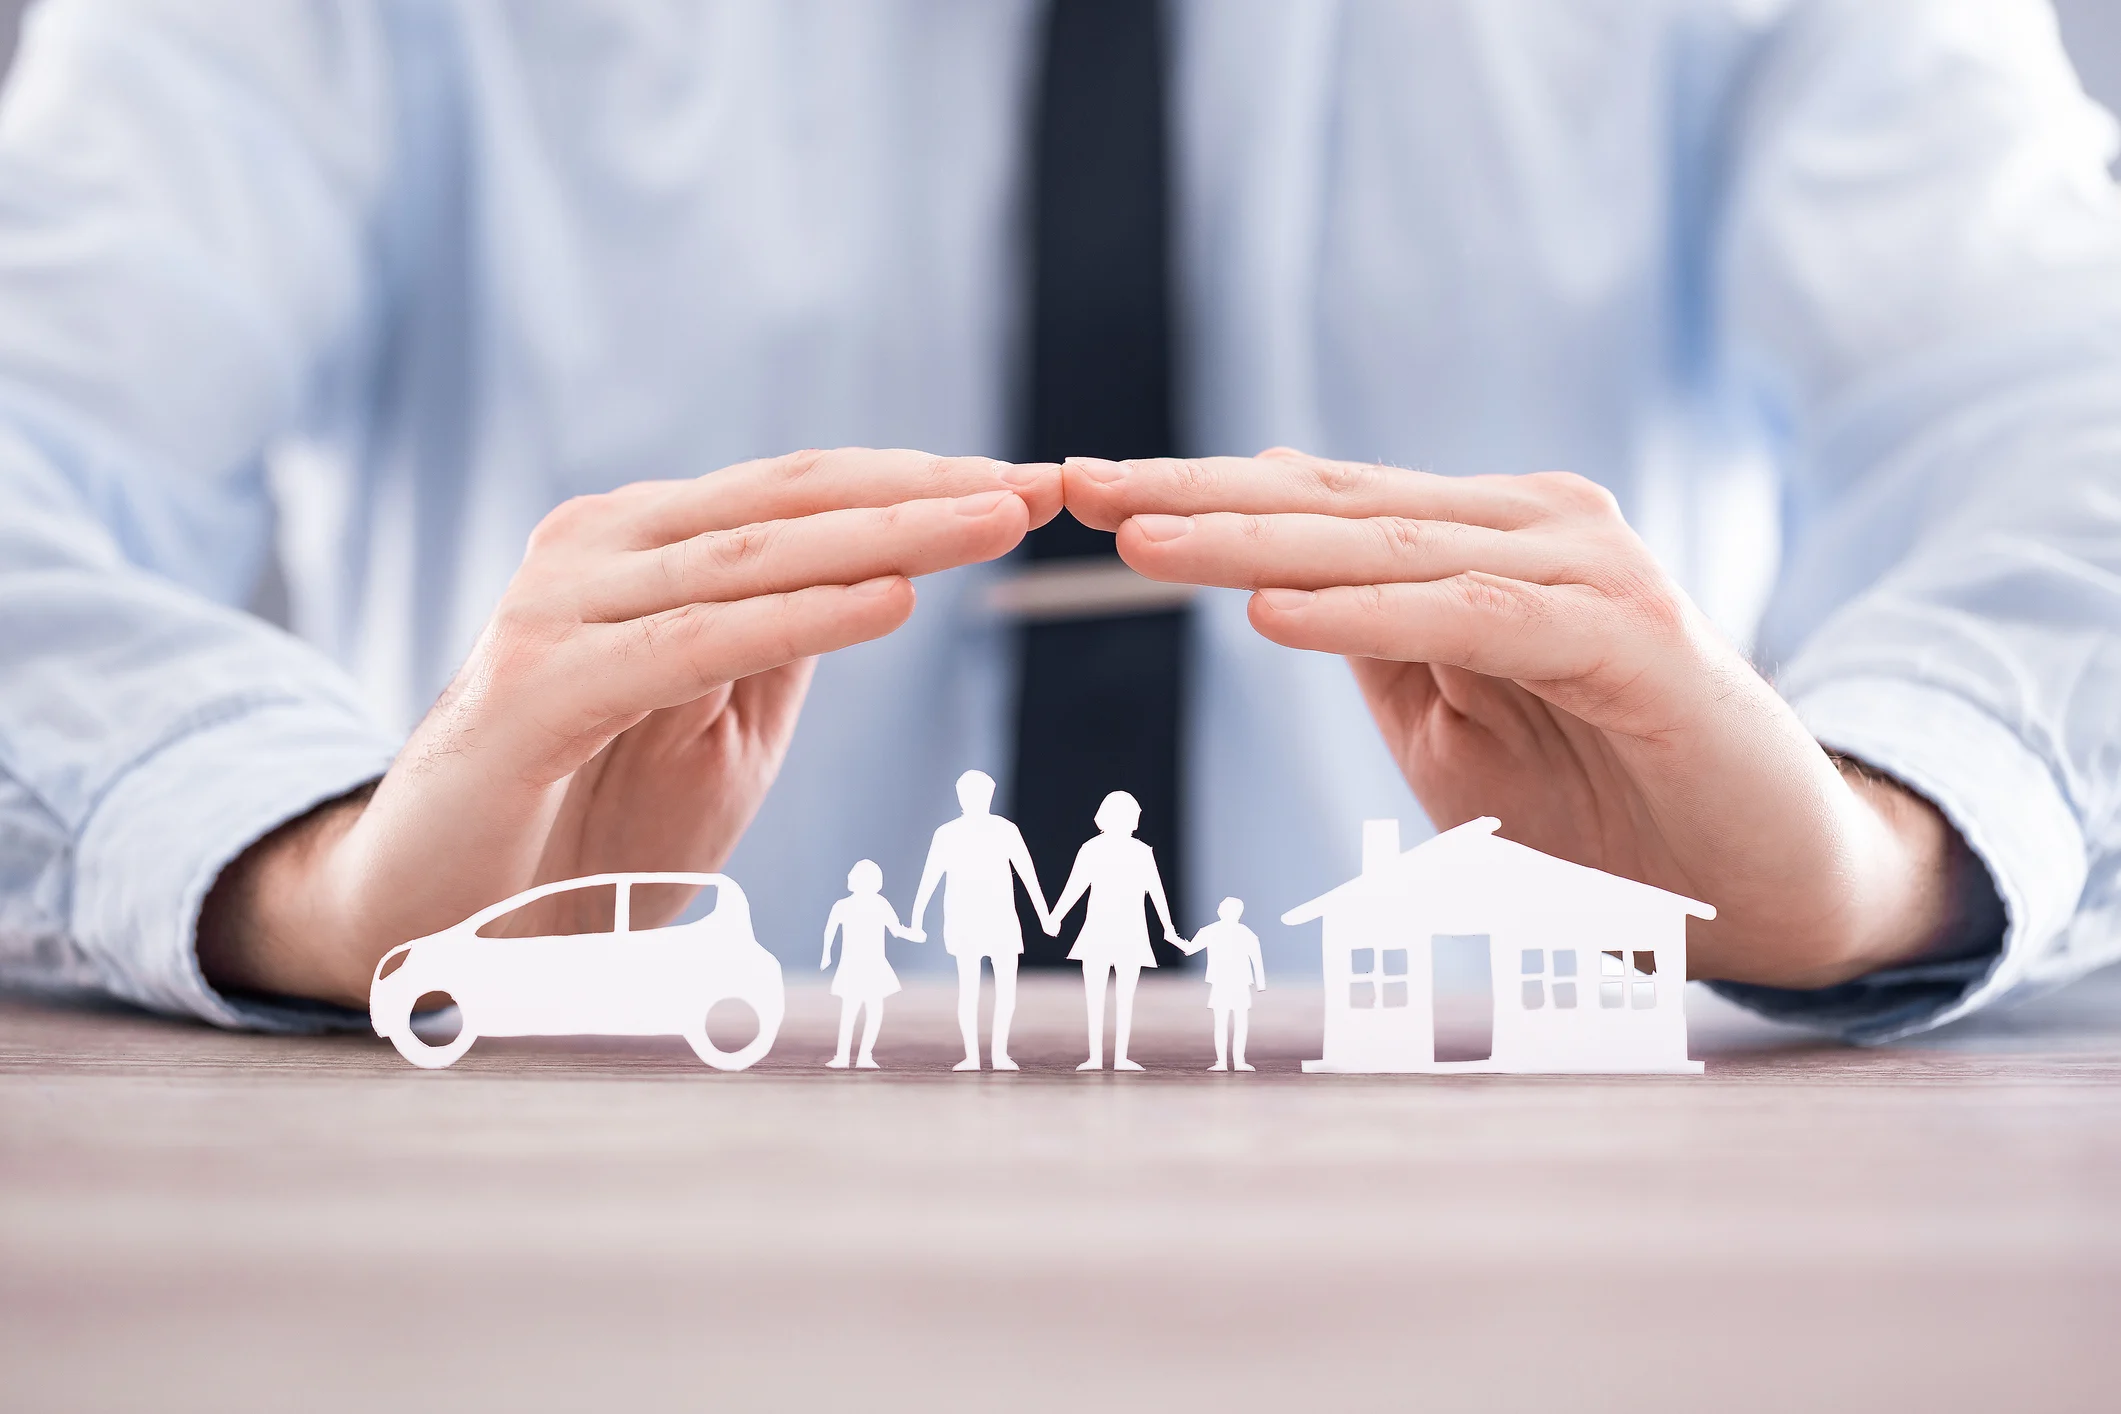

##### **Project Type**    - Supervised Learning(Classification)
##### **Contribution**    - Individual
##### **Created by**        - Dr. Raj Kumar

## **GitHub Link -**

 **GitHub Link: https://github.com/rajkumarpec/Supervised-Learning-Classification- **

## **Project Summary**

* This project aimed to help an insurance company expand its business by offering vehicle insurance to its existing health insurance customers. To achieve this goal, the company needed to identify which customers were likely to be interested in purchasing vehicle insurance. To build a predictive model, the company collected data on its past customers and used this data to create a model that predicts customer interest in vehicle insurance.

* The first step in the project was to clean and explore the data. The data contained no duplicate or null values and the columns were converted to appropriate data types. Exploratory data analysis was conducted to identify any trends or patterns in the data. Through this analysis, it was found that a greater number of interested customers were male.

* In order to develop a predictive model, four machine learning algorithms were compared: Logistic Regression, K-Nearest Neighbors, Random Forest, and XGBoost. Several evaluation metrics were used, including precision, recall, f1-score, accuracy, average precision, and ROC AUC score. Hyperparameter tuning was also used to optimize the models' performance.

* The dataset used in the study consisted of 381109 observations and 12 features. Feature Engineering analysis was conducted to identify any missing values, outliers, or correlations between features. also performed to transform categorical variables into numerical variables. The dataset was then split into training and testing sets with a ratio of 70:30.

* After evaluating the four machine learning algorithms, it was found that Gradient Boosting provided the best overall performance in terms of accuracy, precision, recall, and F1 score. The Gradient Boosting algorithm achieved an accuracy of 84% and an average precision, recall, and F1 score of 84%, 85%, and 84%, respectively. It also achieved a ROC AUC score of 84%. While other algorithms such as Random Forest, XGBoost, KNN, and Logistic Regression performed well with accuracy scores ranging from 80% to 82%, they did not outperform the Gradient Boosting algorithm.

* These results suggest that the Gradient Boosting algorithm is an effective machine learning approach for predicting customer interest in vehicle insurance. The predictive model could be used to inform targeted marketing campaigns for the insurance company. Overall, the project successfully demonstrated the usefulness of machine learning algorithms in identifying potential customers and expanding a business's customer base.

## **Business context**

Like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer. An isurance company want to build a model to predict whether a customer would be interested in Vehicle Insurance. So, company makes communication strategy to reach out to those customers and optimise its business model and revenue.

## **Problem Statements**

The purpose of this project is to predict customer interest in vehicle insurance by utilizing a dataset of 381109 observations and 12 features. The data includes information on demographics (such as gender, age, and region code type), vehicles (vehicle age and damage), and policy (premium and sourcing channel). The dependent variable of interest is represented by the Response column, which indicates whether a customer is interested in vehicle insurance or not. The goal is to develop a model that can accurately predict customer interest in vehicle insurance.

## ***Let's Begin !***

## ***1. Data Understanding***

In [ ]:
# import google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score


# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Read dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/3-Supervised ML-Classification/10-Health insurance cross sell prediction/data.csv')

In [ ]:
# Let's see how the dataset looks like
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


## Dataset Information

In [ ]:
# dataset rows & columns counts
 
print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 381109 
 Number of columns 12


## Missing values/Null values

In [ ]:
df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,id,0
1,Gender,0
2,Age,0
3,Driving_License,0
4,Region_Code,0
5,Previously_Insured,0
6,Vehicle_Age,0
7,Vehicle_Damage,0
8,Annual_Premium,0
9,Policy_Sales_Channel,0


In [ ]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


In [ ]:
# Describe the dataset 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


In [ ]:
# fetch basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


## **2. Understanding your variables**

In [ ]:
# fetch attribute
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## Attribute Description

* **id :** Unique ID for the customer

* **Gender :** Gender of the customer

* **Age :** Age of the customer

* **Driving_License :** 0 = Customer does not have DL, 1 = Customer already has DL

* **Region_Code :** Unique code for the region of the customer

* **Previously_Insured :** 1 = Customer already has Vehicle Insurance, 0 = Customer doesn't have Vehicle Insurance

* **Vehicle_Age :** Age of the Vehicle

* **Vehicle_Damage :** 1 = Customer got his/her vehicle damaged in the past. 0 = Customer didn't get his/her vehicle damaged in the past.

* **Annual_Premium  :** The amount customer needs to pay as premium in the year

* **Policy Sales Channel :** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* **Vintage :** Number of Days, Customer has been associated with the company

* **Response :** 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
#checking unique values
df.nunique().reset_index().rename(columns={'index':'Columns',0:'Unique values'})

,Columns,Unique values
0,id,381109
1,Gender,2
2,Age,66
3,Driving_License,2
4,Region_Code,53
5,Previously_Insured,2
6,Vehicle_Age,3
7,Vehicle_Damage,2
8,Annual_Premium,48838
9,Policy_Sales_Channel,155


## What did you know about your dataset?

* >The dataset cointains customer and their vehicles information of a vehicles insurance company, and our aim to Predict whether a customer would be interested in Vehicle Insurance.
* >There are not any null and duplicate value in the dataset.
* >Dataset has 381109 entries with 12 features.
* >Out of 12 features, 9 are numeric while 3 are of object type.


## **3. Data Wrangling**

* **Data wrangling** (Also known as **data munging**) is the practice of cleansing, restructuring, and enriching raw data. This process is very critical for businesses to perform because it is the only method that makes raw data usable. 
* Raw data is complex because it has not been processed or integrated into a system. With data wrangling, these records are transformed into a standard format that helps highlight valuable insights. The process entails consolidating data into one location and rectifying any missing information or errors.

, 

## Droping and renaming the features:

In [ ]:
# drop Id columns 
df.drop('id',inplace=True,axis=1)

## Extract categoricals and Numerical columns

In [ ]:
# make a function to extract categorical and numerical columns
def extract_cat_num(df):
  '''
  This function extract categorocal and Numerical columns in dataset
  '''

  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col,num_col

In [ ]:
# initialize objects cat_col and num_col  

cat_col,num_col=extract_cat_num(df)

In [ ]:
# fetch categorical columns
cat_col

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
# fetch unique value in categorical feature columns

for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

Gender has ['Male' 'Female'] values


Vehicle_Age has ['> 2 Years' '1-2 Year' '< 1 Year'] values


Vehicle_Damage has ['Yes' 'No'] values




## Visualize categorical columns

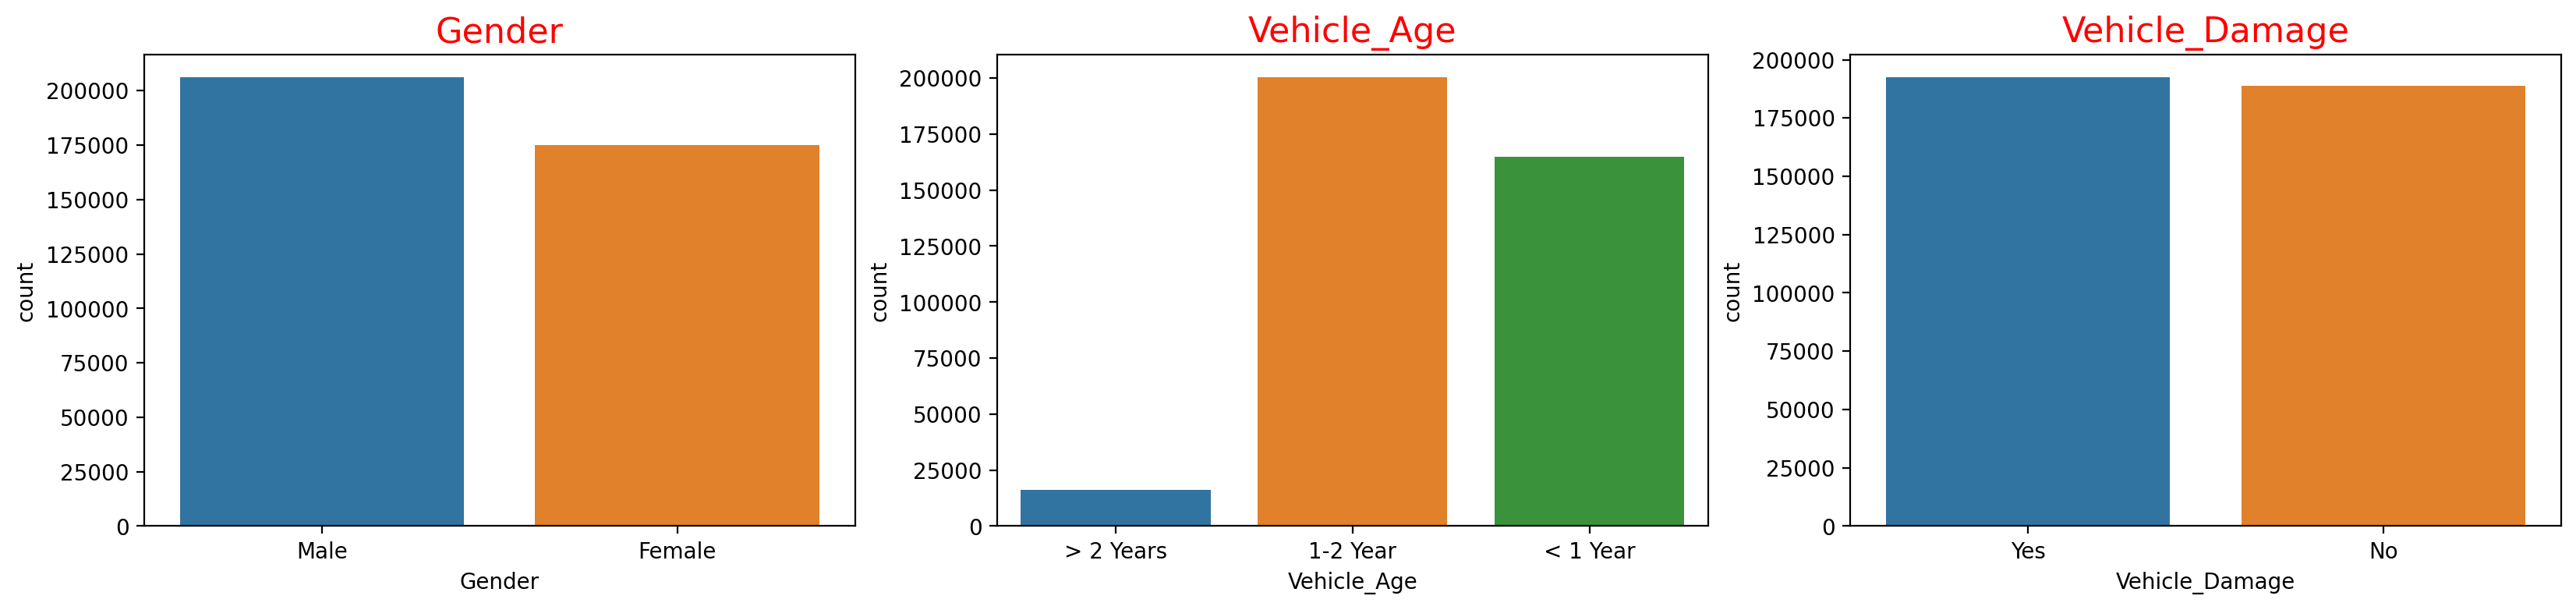

In [ ]:
plt.figure(figsize=(20,4),dpi=200)

for i,feature in enumerate(cat_col):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[feature])
  plt.title(feature,fontsize=16,color='red')

In [ ]:
# fetch numerical columns 
num_col

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

# Visualization of Numeric columns

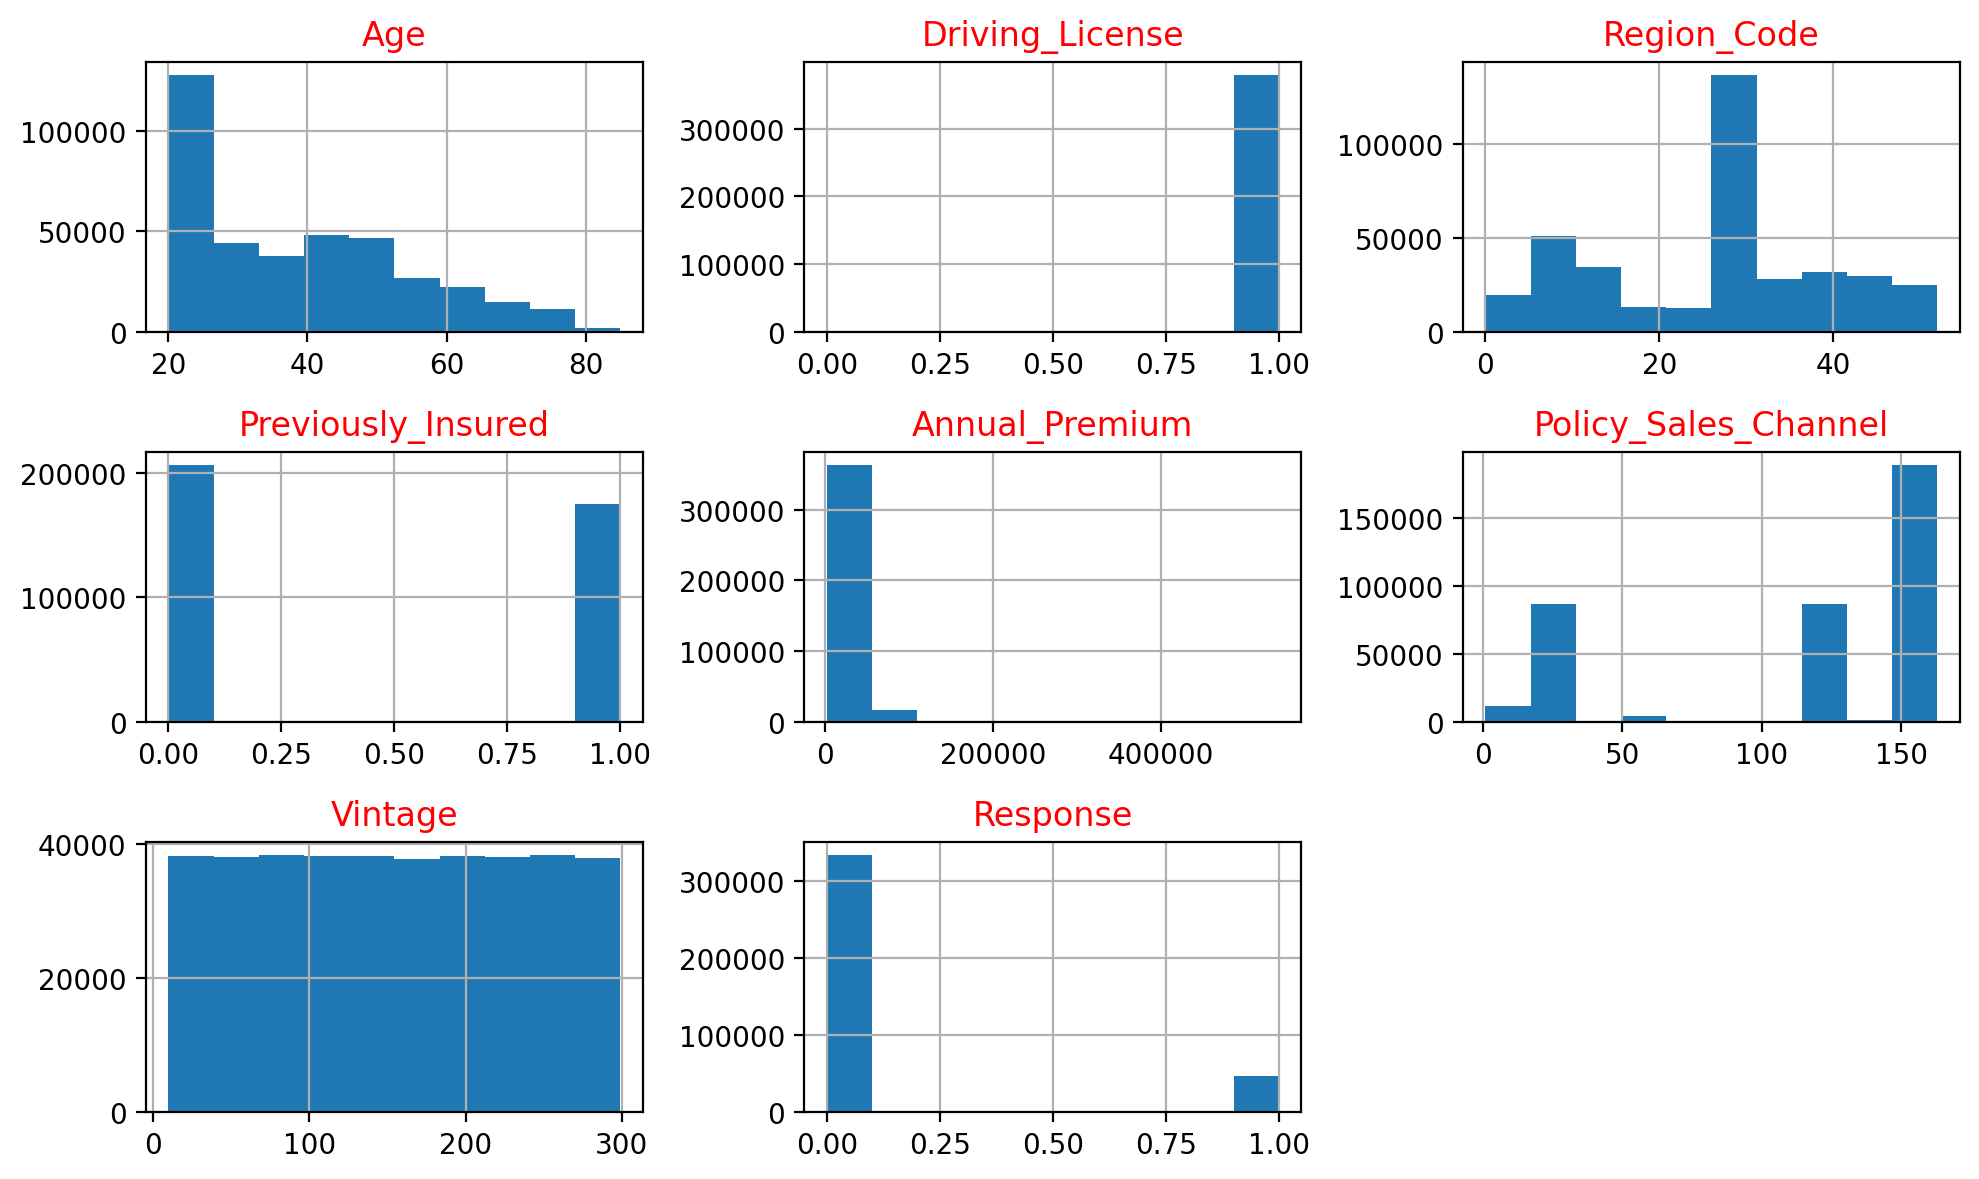

In [ ]:
plt.figure(figsize=(10,6),dpi=200)

for i,feature in enumerate(num_col):
  plt.subplot(3,3,i+1)
  df[feature].hist()
  plt.title(feature, fontsize=12,color='red')
  plt.tight_layout()

In [ ]:
# check data types 
df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


## What all manipulations have you done and insights you found?

* >Dropped the id column
* >All attributes don't have any discrepancy, so no need to correct any attribute column.
* >Categorical columns are: Gender, Vehicle_Age, Vehicle_Damage 
* >Numerical columns are: Age, driving_License, Response Previously_InsuredRegion_Code, Annual_Premium, Policy_Sales_Channel, Vintage
* >Response attribute is our Output 

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## **Chart - 1 - Pie Chart on Dependant Variable i.e., Response (Univariate):**

0    334399
1     46710
Name: Response, dtype: int64

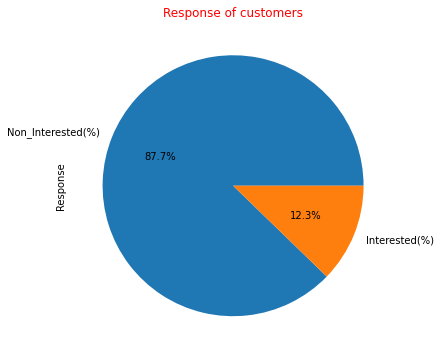

In [ ]:
# Dependant Variable Column Visualization
df['Response'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%",shadow=False,labels=['Non_Interested(%)','Interested(%)'])
plt.title('Response of customers',color='red');

# count of Target variable
df['Response'].value_counts()

## 1. Why did you pick the specific chart?

* A pie chart is a useful tool to display the distribution of various categories in a dataset. By dividing the circle into proportional sections, each representing a different category, the pie chart allows for a clear comparison of the relative size of each category. The use of different colors for each section further enhances the clarity of the representation and makes it easier to understand and interpret the data.

## 2. What is/are the insight(s) found from the chart?

* The data shows that a large majority (87.7%) of customers are not interested, while a smaller portion (12.3%) are interested. The response variable is imbalanced with more instances of "not interested" than "interested".

## 3. Will the gained insights help creating a positive business impact? 

* It depends on the specific business scenario and the insights that were gained from the pie chart. The pie chart provides information on the proportion of different categories in a dataset, but it is up to the business to use that information in a meaningful way to drive positive impact. 
* For example, if the pie chart showed a large proportion of customers who were not interested, the business could use that information to identify areas for improvement and increase customer engagement. On the other hand, if the pie chart showed a large proportion of customers who were interested, the business could capitalize on that by focusing on maintaining and growing that customer base. 
* Ultimately, the impact will depend on how the insights are applied and acted upon by the business.

## **Chart - 2- Visulization of categorical variable with Target variable (Response):**

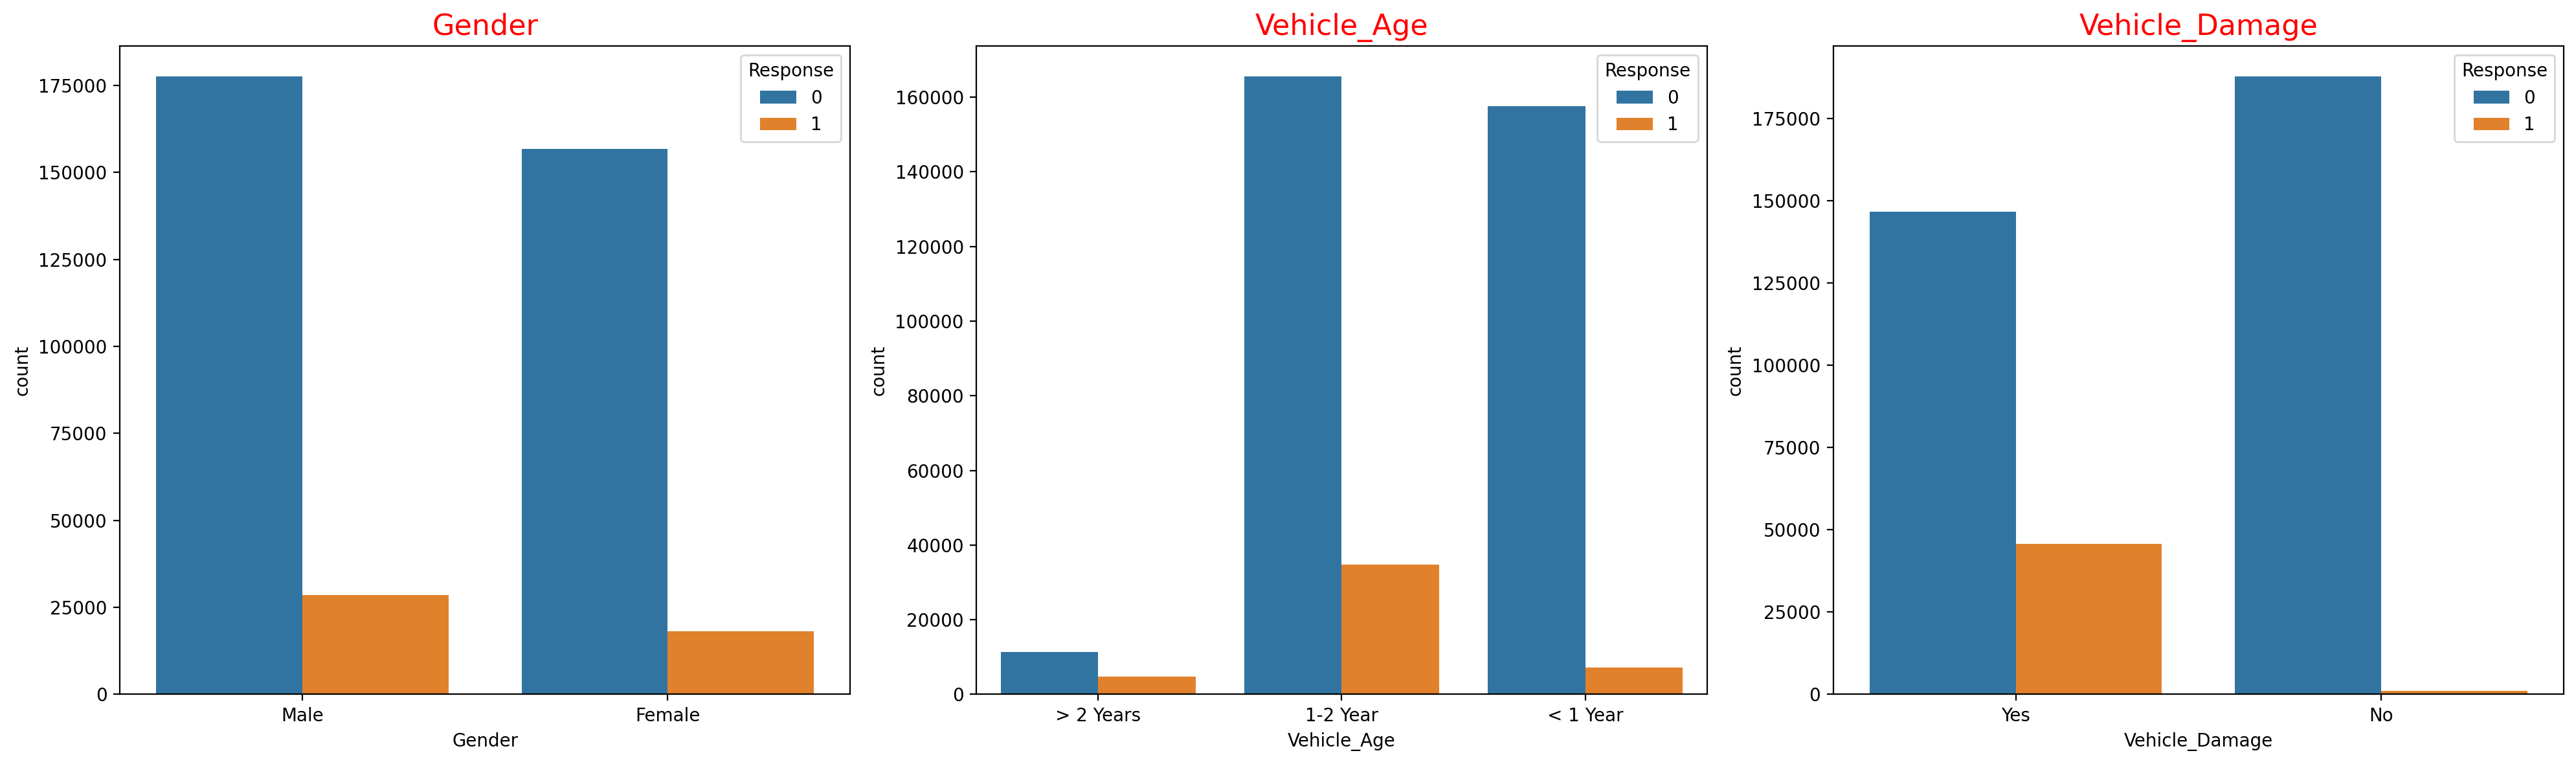

In [ ]:
# Analysing the distribution of categorical variables in the dataset

plt.figure(figsize=(20,6),dpi=200)

for i, feature in enumerate(cat_col):
  plt.subplot(1, len(cat_col), i+1)
  sns.countplot(x=df[feature], hue='Response', data=df)
  plt.title(feature, fontsize=16, color='red')
  plt.tight_layout()


## 1. Why did you pick the specific chart?

* A count plot, also referred to as a bar plot, is a visualization technique that displays the frequency of each category in a categorical or nominal variable. The frequency counts are represented as bars, making it simple to understand the distribution of values in the dataset. Furthermore, the y-axis can be adjusted to show not just the count, but also other statistics such as the percentage of total values for each category. This additional information helps to provide deeper insights into the data and facilitates easy comparison of the proportions of different categories.

## 2. What is/are the insight(s) found from the chart?

The code creates a figure with subplots for each feature in cat_col, and the bar plots show the count of each category in the feature colored by the target variable Response. 
* The statement "Male are more interested in vehicle insurance than female" can be confirmed by checking the count of males and females in the bar plot of the feature representing gender. 
* The statement "In term of vehicle_age, vehicle_age of 1-2 year are more interested in insurance followed by < 1 year and >2 years" can be confirmed by checking the count of each vehicle age category in the bar plot of the feature representing vehicle age. 
* The statement "Customers having Vehicle_damage are more interested in insurance" can be confirmed by checking the count of customers with and without vehicle damage in the bar plot of the feature representing vehicle damage.






## 3. Will the gained insights help creating a positive business impact? 
*  If the goal is to target customers who are more likely to purchase insurance.
* The insights gained from the plots indicating that male customers and customers with 1-2 year old vehicles are more interested in insurance could inform targeted marketing efforts. 


## **Chart - 3- Visulization of continuous variable with Target variable:**

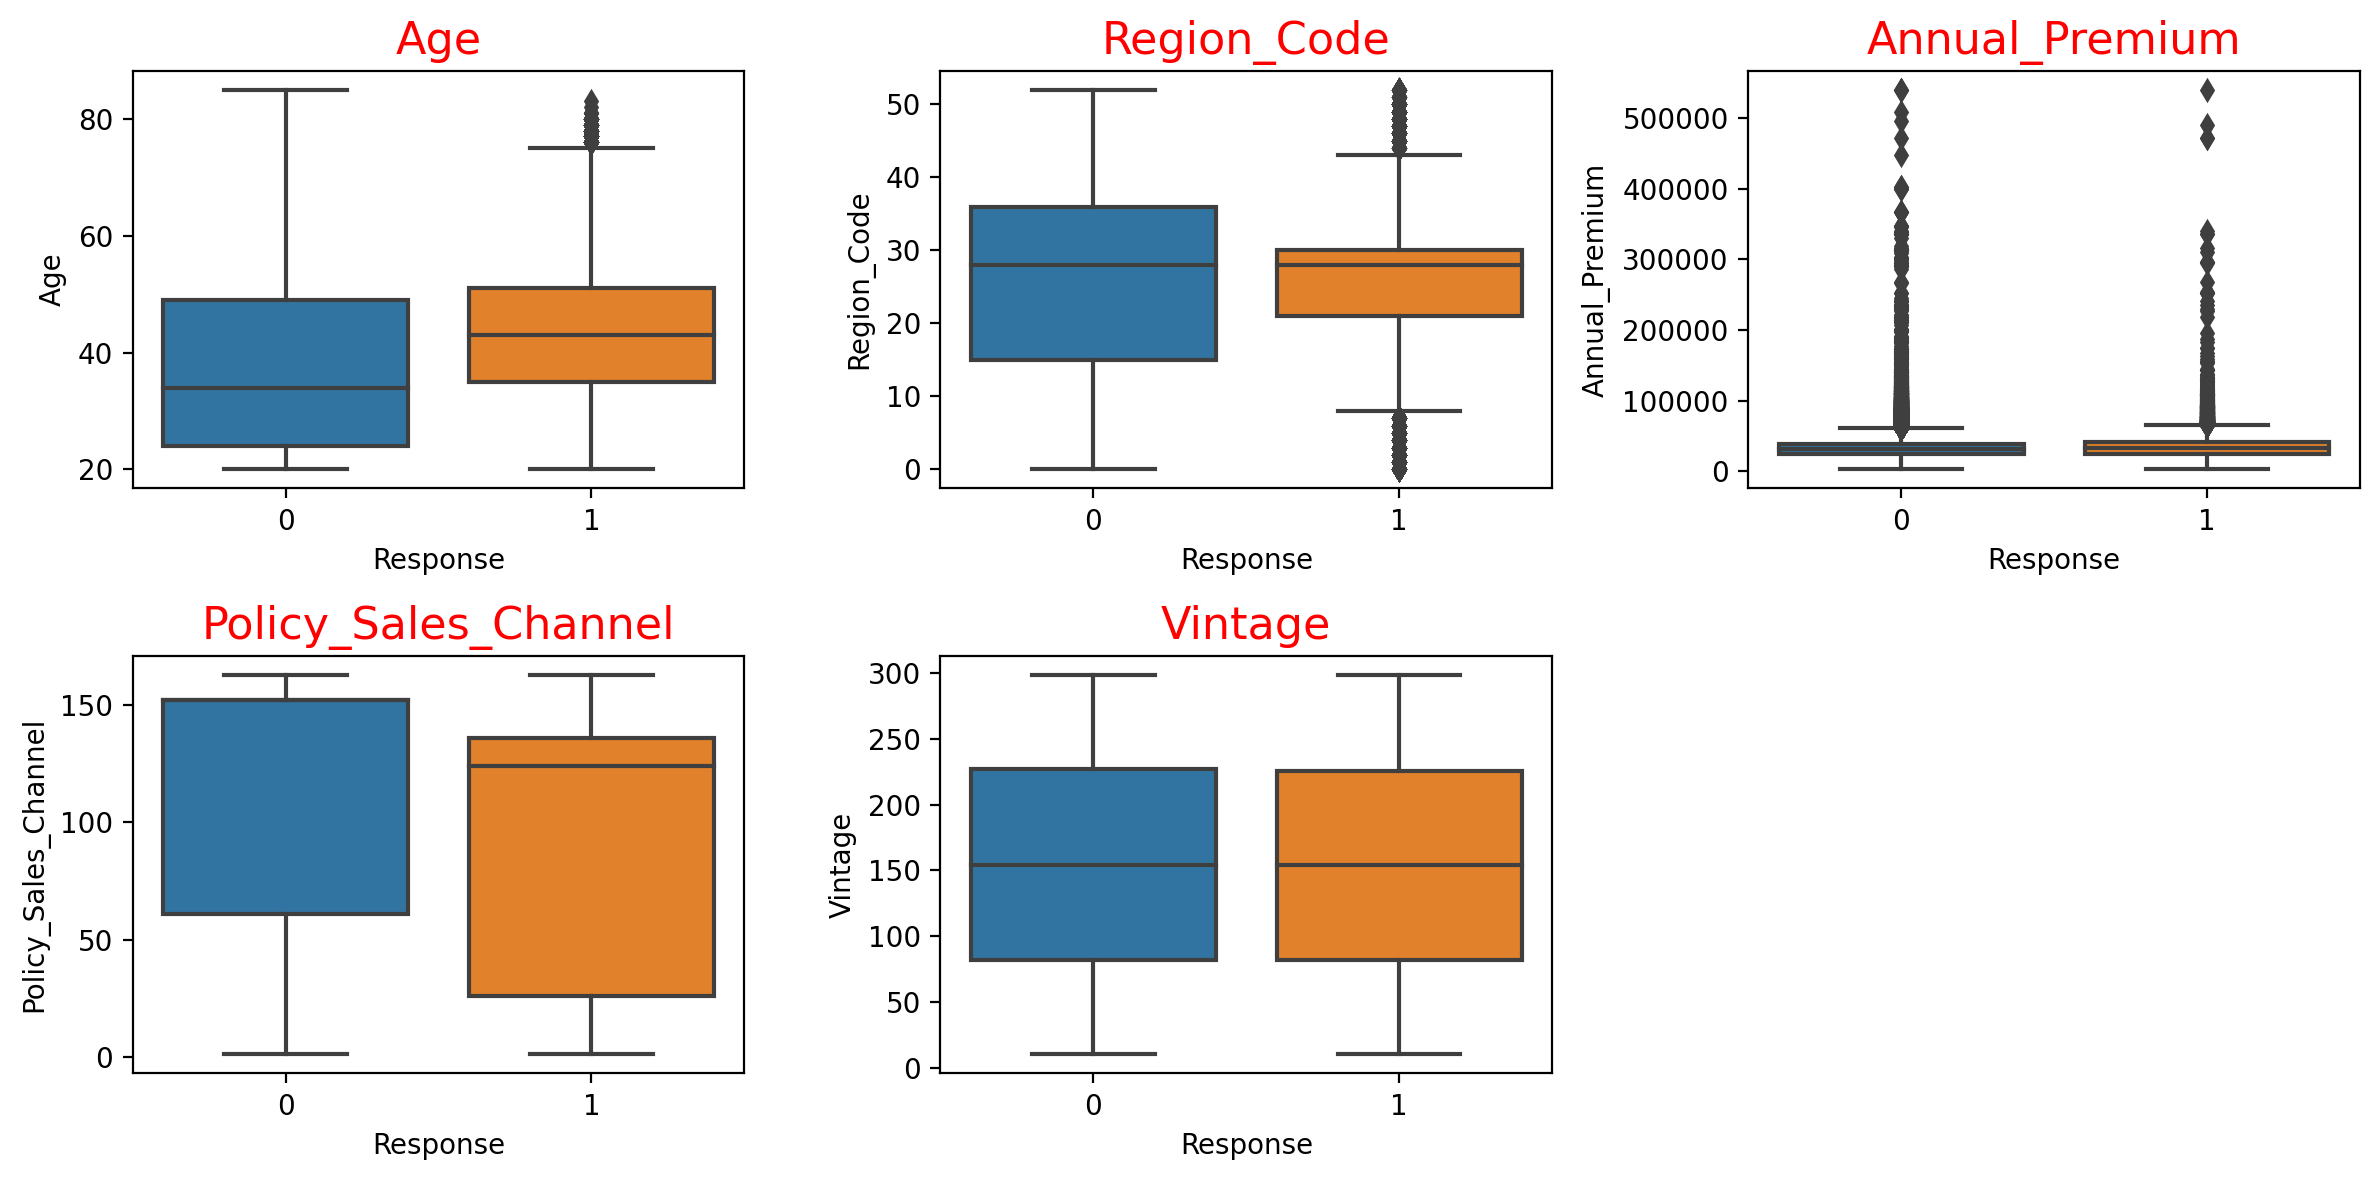

In [ ]:
# checking Outliers in numeric features using seaborn boxplot

# list of continuous columns in dataset

list=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

plt.figure(figsize=(12,6), dpi=200)

for i, feature in enumerate(list):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Response', y=df[feature], data=df)
    plt.title(feature, fontsize=16, color='red')

plt.tight_layout()


## 1. Why did you pick the specific chart?

* A box plot, or box and whisker plot, is a visualization technique used to show the distribution of continuous data, not categorical data. The plot displays information about the shape of the distribution, including the median, quartiles, and outliers. The box of the plot displays the interquartile range (IQR), which represents the range between the first and third quartiles (25th and 75th percentiles), while the whiskers extend to the minimum and maximum values, excluding outliers. Outliers are plotted as individual points outside of the whiskers.

* The box plot provides a concise summary of the data, making it useful for comparing distributions across different groups or for identifying potential outliers or skewness in the data. However, it is not suitable for visualizing categorical or nominal data. For categorical data, you would typically use a bar plot instead.

## 2. What is/are the insight(s) found from the chart?

This code creates a figure with multiple subplots, each showing the relationship between a continuous feature and the target variable Response. The sns.boxplot function is used to plot the features, with the box plot showing any potential outliers in the data. The target variable Response is used to color the boxes, allowing for a visual assessment of the relationship between the feature and the target variable.

From the description, it seems that only the Annual_Premium feature has outliers, which may have an impact on the performance of machine learning algorithms. It's important to consider this when selecting or preprocessing features for modeling.





## 3. Will the gained insights help creating a positive business impact? 
*   The insights lead to informed decisions and effective strategies, they have the potential to drive positive business impact.

## **Chart -4 - Displot for all numerical col with Target variable:**

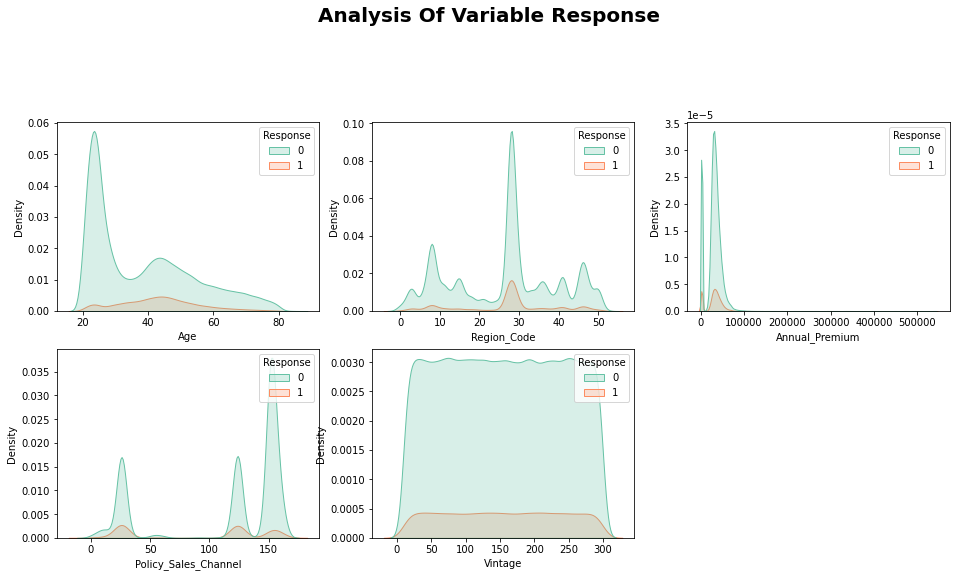

In [ ]:
plt.figure(figsize = (16, 16))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(4,3,1)
sns.kdeplot(x='Age', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,2)
sns.kdeplot(x='Region_Code', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,3)
sns.kdeplot(x='Annual_Premium', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,4)
sns.kdeplot(x='Policy_Sales_Channel', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(4,3,5)
sns.kdeplot(x='Vintage', hue='Response', palette = 'Set2', shade=True, data=df)


## 1. Why did you pick the specific chart?

* Display a univariate or bivariate distribution using a histogram, kernel density estimation, or rug plot. Displots are available in the seaborn library in Python and are useful for visualizing the distribution of data.

## 2. What is/are the insight(s) found from the chart?

From this insights, we came to know that there are Age and Annual_premium are positively skewed.

## **Chart -5 - Relationship between Age and Target column:**

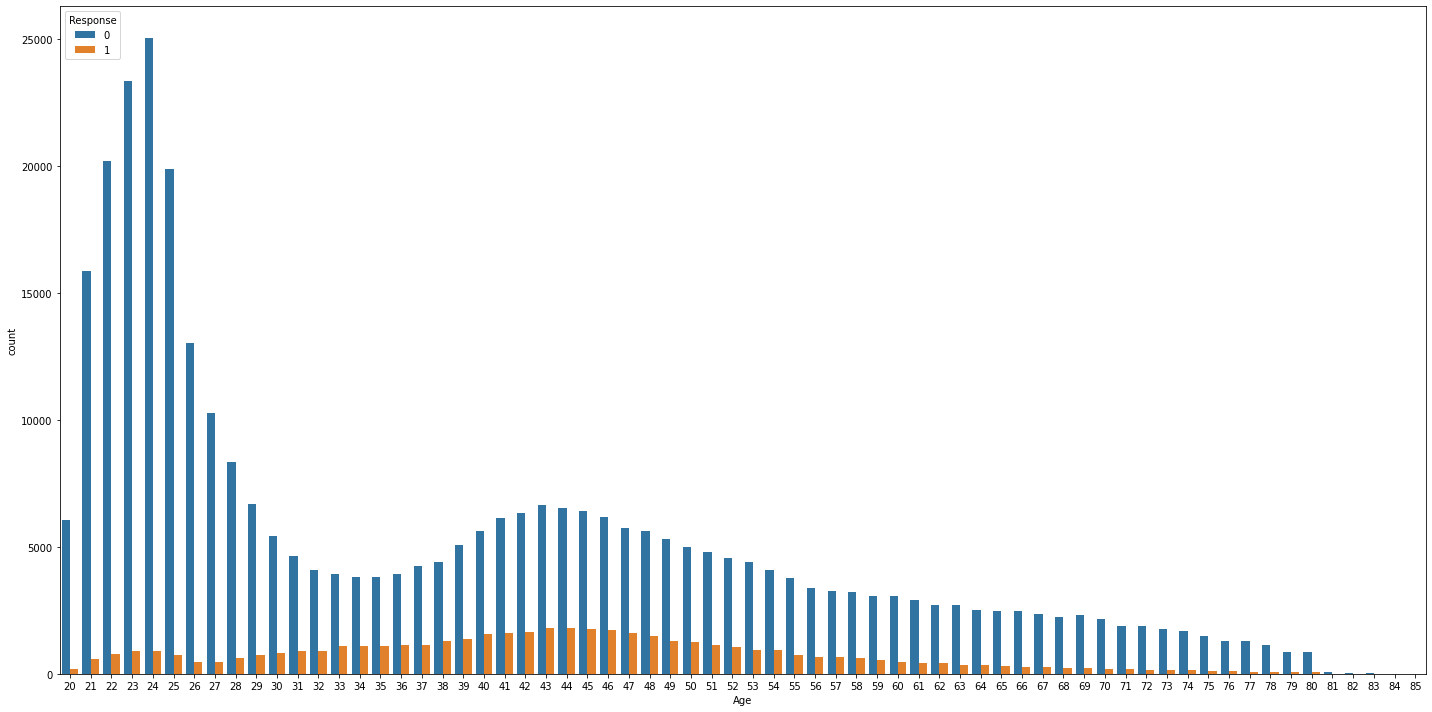

In [ ]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df);
plt.tight_layout()

## 2. What is/are the insight(s) found from the chart?

This interpretation of the graph is based on the assumption that the height of the bars represents the number of people who are interested in vehicle insurance, and the x-axis categories represent different age groups. Based on the description given, it seems that the 20-30 age group has a higher count of people who are interested in vehicle insurance compared to 50+ age groups, although the 30-50 age group has the highest overall interest in vehicle insurance.




## 3. Will the gained insights help creating a positive business impact? 
*   If the target audience for vehicle insurance is primarily in the 20-30 age and 30-50 age group.

## **5. Hypothesis Testing**

* The null hypothesis (H0):  would be that there is no relationship between the predictors and the response variable (vehicle insurance purchase). 
* Alternative hypothesis (Ha): would be that there is a relationship between the predictors and the response variable.

In [ ]:
# performing the independant t test on numerical varialbe
import scipy.stats as stats

# make a dataframe
tstats_df= pd.DataFrame()

# run a loop for all numerical variable
for i in num_col:
  tstats= stats.ttest_ind(df.loc[df['Response']==1,i],df.loc[df['Response']==0,i])
  temp= pd.DataFrame([i,tstats[0],tstats[1]]).T
  temp.columns=['Variable Name','T-statstic','P-value']
  tstats_df=pd.concat([tstats_df,temp],axis=0,ignore_index=True)

tstats_df=tstats_df.sort_values(by='P-value').reset_index(drop=True)
tstats_df


,Variable Name,T-statstic,P-value
0,Age,69.043065,0.0
1,Previously_Insured,-224.06105,0.0
2,Policy_Sales_Channel,-86.67763,0.0
3,Response,inf,0.0
4,Annual_Premium,13.939784,0.0
5,Region_Code,6.525545,0.0
6,Driving_License,6.269505,0.0
7,Vintage,-0.648436,0.516704


Variables and their P-value

Here our level of significance(alpha ) is 0.05. we got variable id,Vintage, which are not significance so we reject the null hypothesis.




## **6. Feature Engineering**

In [ ]:
df.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


## Convert columns to appropriate datatypes:

* changing categorical value to numerical values

In [ ]:
# Assume vehicle_Age as an ordinal categorical 

from sklearn.preprocessing import OrdinalEncoder

# Define the ordering of categories
age_ordering = ['< 1 Year', '1-2 Year', '> 2 Years']

# Create an ordinal encoder with the specified ordering
encoder = OrdinalEncoder(categories=[age_ordering])

# Fit and transform the encoder on the 'Vehicle_Age' column in train_df
df['Vehicle_Age'] = encoder.fit_transform(df[['Vehicle_Age']])


In [ ]:
# OneHotEncoding using pandas (Gender and Vehicle_Damage as a nominal category)

df=pd.get_dummies(df,columns=['Gender','Vehicle_Damage'],drop_first=True)

In [ ]:
df.head(5)

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,44,1,28,0,2.0,40454,26,217,1,1,1
1,76,1,3,0,1.0,33536,26,183,0,1,0
2,47,1,28,0,2.0,38294,26,27,1,1,1
3,21,1,11,1,0.0,28619,152,203,0,1,0
4,29,1,41,1,0.0,27496,152,39,0,0,0


In [ ]:
df.keys()

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Gender_Male', 'Vehicle_Damage_Yes'],
      dtype='object')

## Handling Outliers

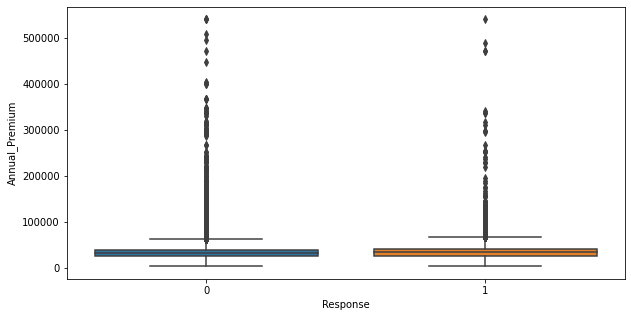

In [ ]:
# Visualizing the outlier using boxplot

plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Premium',x='Response',data=df )

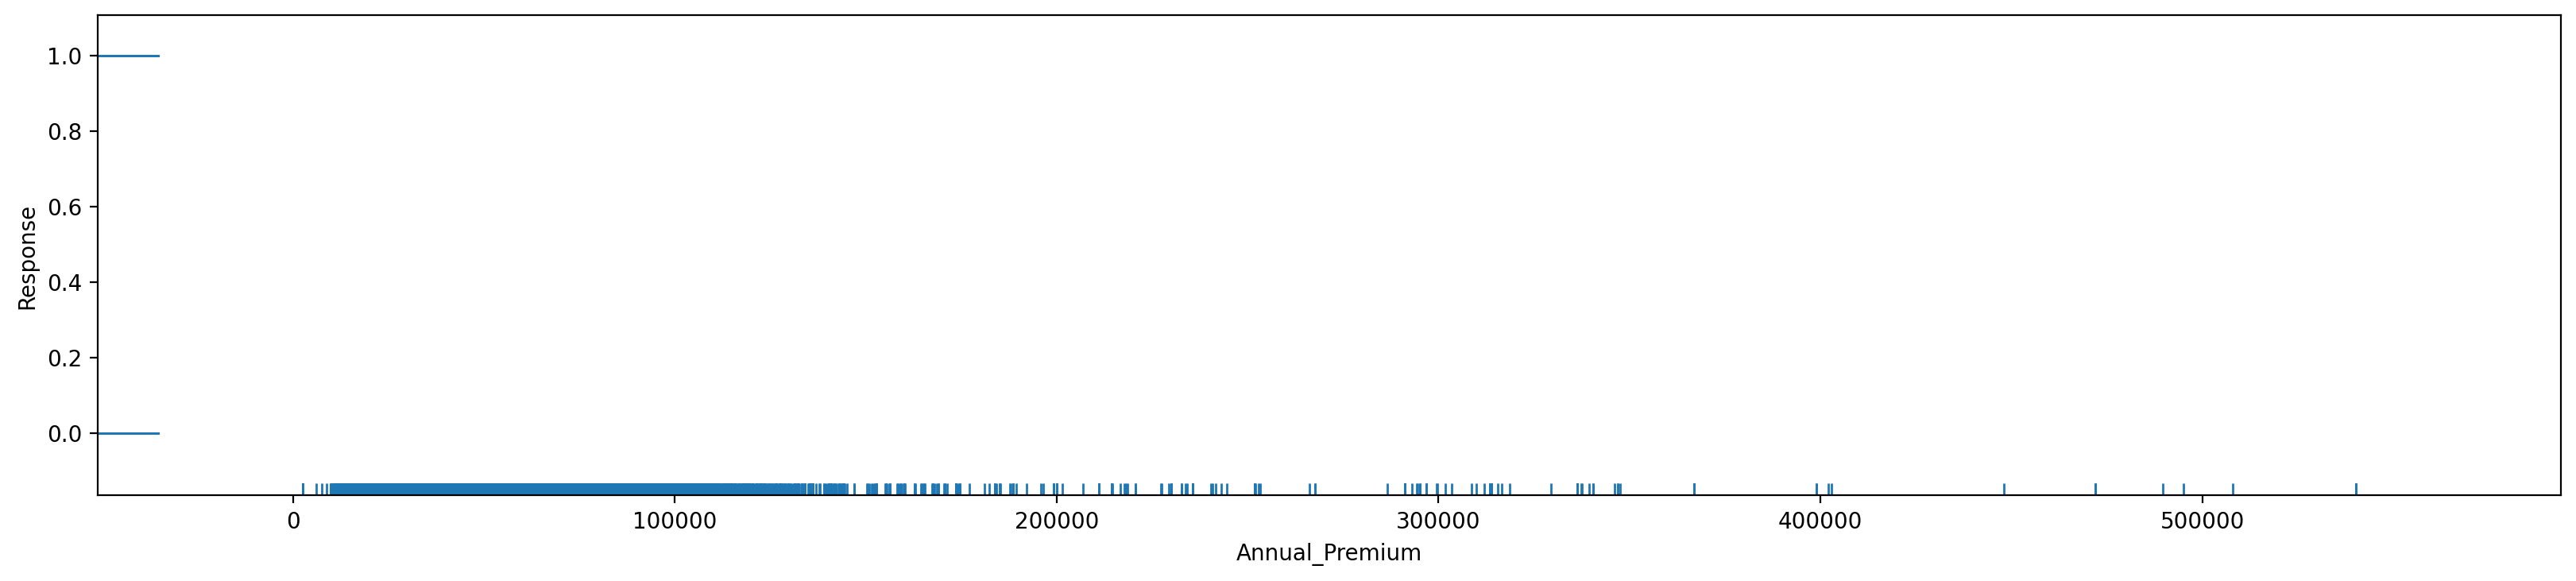

In [ ]:
# Visualizing the variation of Annual_Premium using rugplot

plt.figure(figsize=(20,4),dpi=200)
sns.rugplot(y='Response',x='Annual_Premium',data=df);

In [ ]:
# Number of row having Annual_Premium >140000

outliers = df.loc[df['Annual_Premium']>135000]
outliers.shape

(237, 11)

In [ ]:
# drop row having Annual_Premium >140000
df = df[df['Annual_Premium']<=135000]
df.shape


(380872, 11)

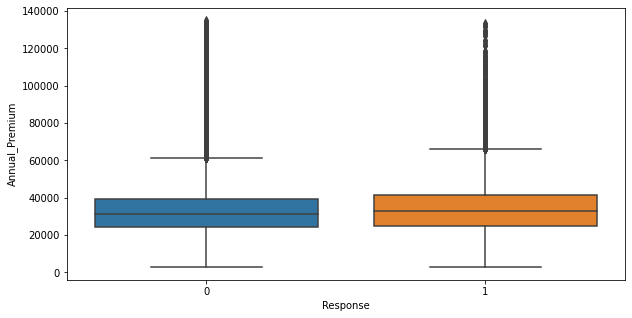

In [ ]:
# again Visualizing the outlier

plt.figure(figsize=(10,5))
sns.boxplot(y='Annual_Premium',x='Response',data=df );

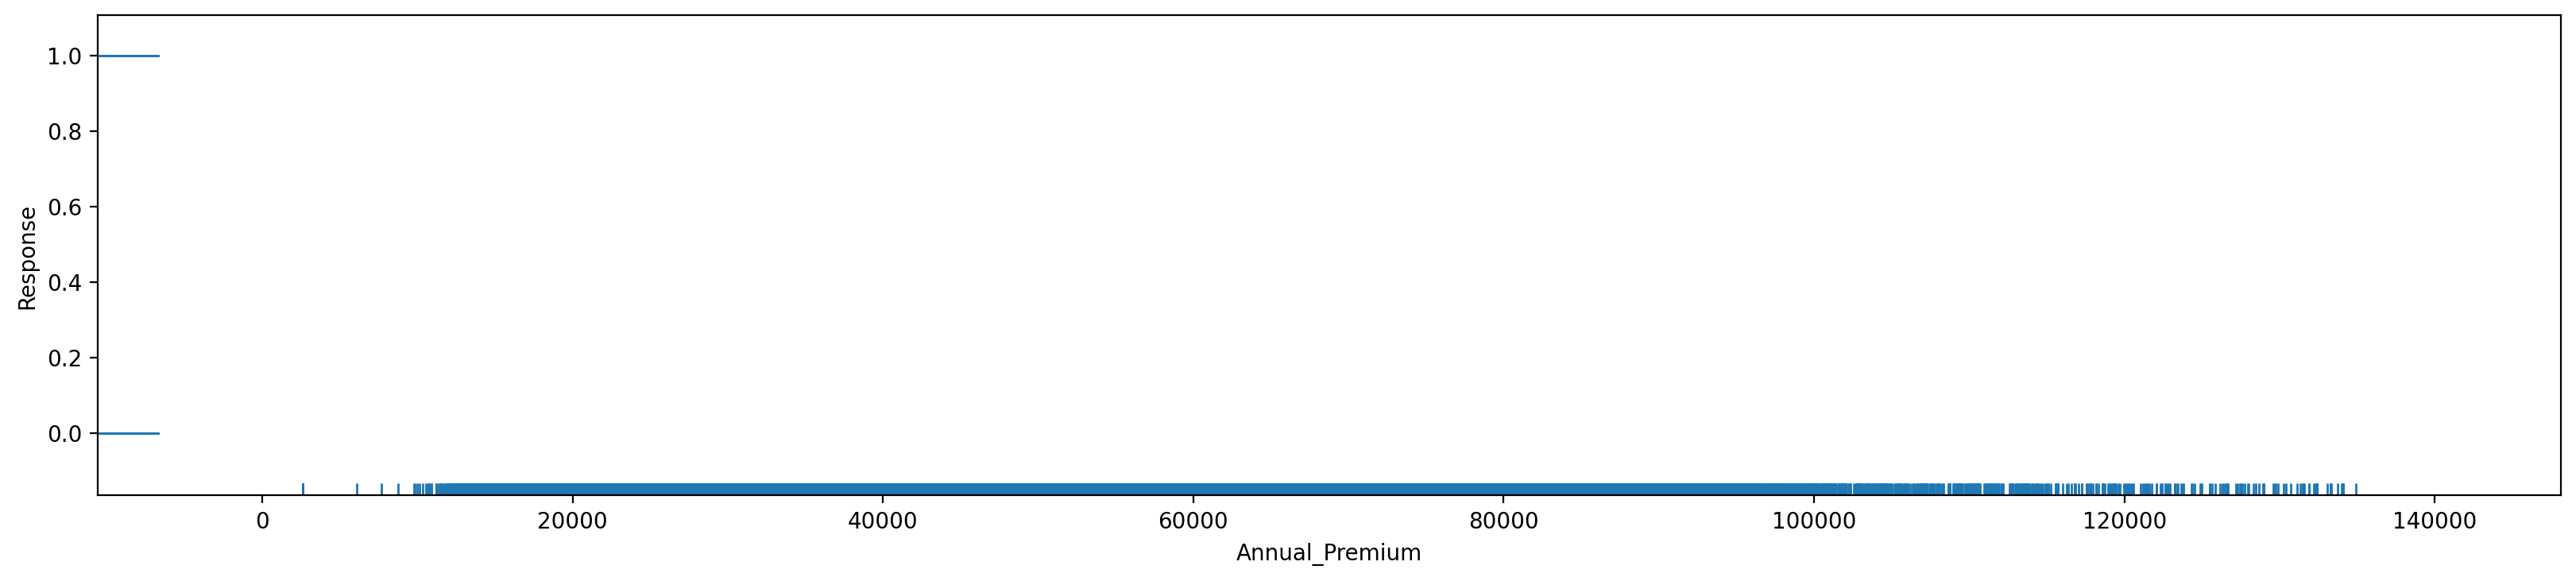

In [ ]:
plt.figure(figsize=(20,4),dpi=200)
sns.rugplot(y='Response',x='Annual_Premium',data=df)

* Removing outliers from the dataset can have an effect on the model performance. If the outliers are affecting the model negatively, i.e., increasing the error rate or bias, removing them may improve the model performance by reducing the error rate or bias.


## **Check Correlation and Multicollinearity between features**

* When performing feature selection in machine learning, it is recommended to perform correlation analysis first to identify highly correlated features. Once this analysis is complete, a variety of feature selection techniques can be used to identify the most important features.

In [ ]:
df.head(5)

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,44,1,28,0,2.0,40454,26,217,1,1,1
1,76,1,3,0,1.0,33536,26,183,0,1,0
2,47,1,28,0,2.0,38294,26,27,1,1,1
3,21,1,11,1,0.0,28619,152,203,0,1,0
4,29,1,41,1,0.0,27496,152,39,0,0,0


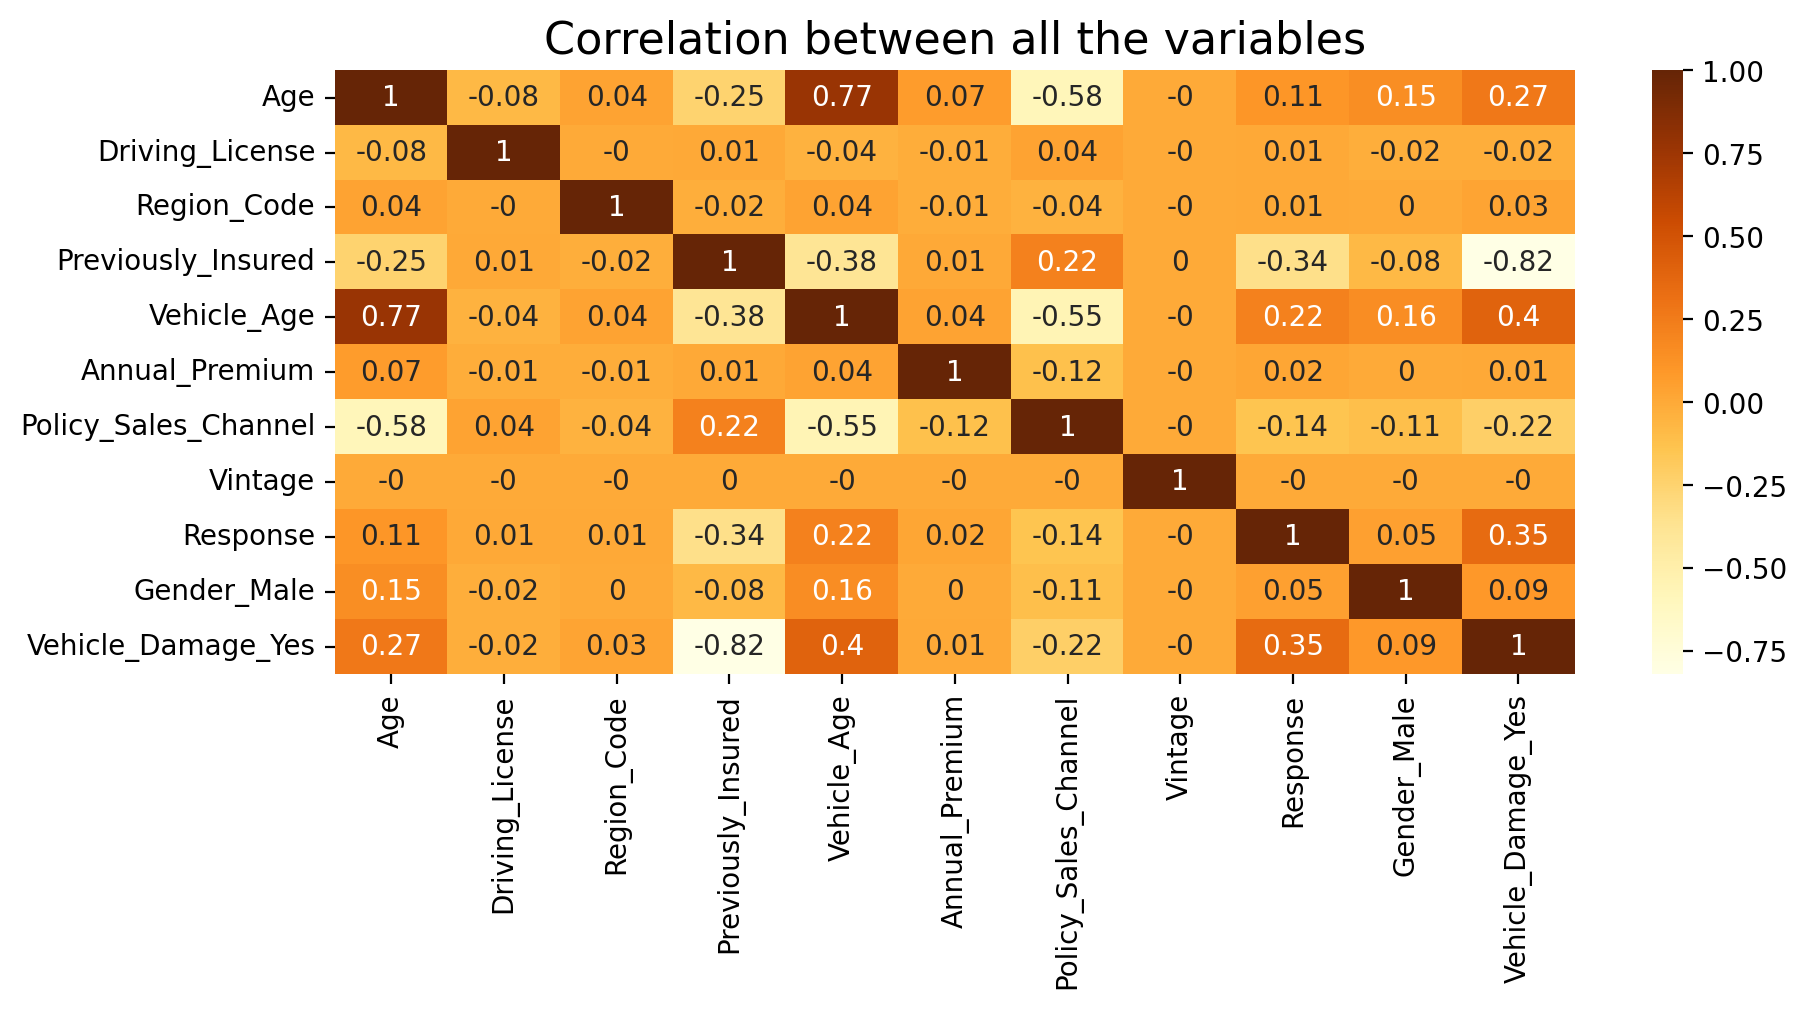

In [ ]:
corr=df.corr().round(2)
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(corr,annot=True,cmap = 'YlOrBr')
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Multicollinearity
def calc_vif(X):

  # VIF dataframe
  vif = pd.DataFrame()
  vif["feature"] = df.columns
  
  # calculating VIF for each feature
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
calc_vif(df)

,feature,VIF
0,Age,18.578553
1,Driving_License,43.449820
2,Region_Code,4.954921
3,Previously_Insured,5.766828
4,Vehicle_Age,6.096404
5,Annual_Premium,4.510497
6,Policy_Sales_Channel,8.097147
7,Vintage,4.373989
8,Response,1.335696
9,Gender_Male,2.236724


In [ ]:
df=df.drop('Driving_License',axis=1)

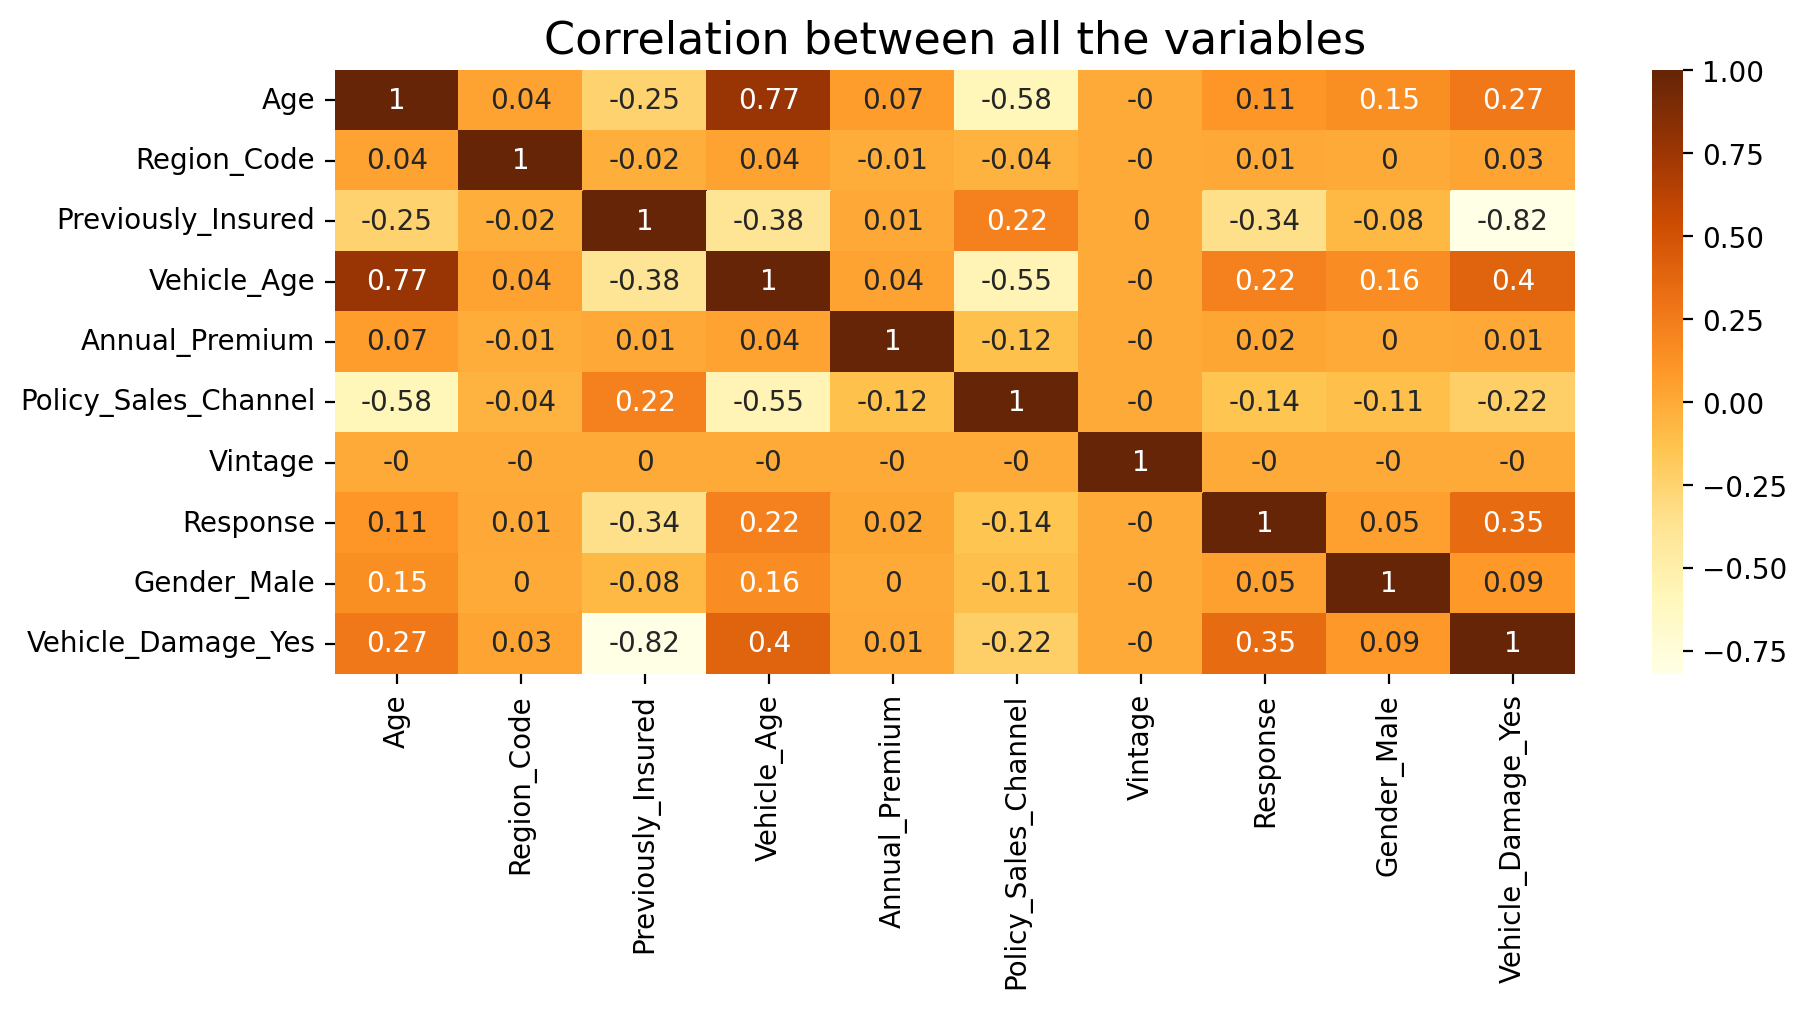

In [ ]:
corr=df.corr().round(2)
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(corr,annot=True,cmap = 'YlOrBr')
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Multicollinearity
def calc_vif(X):

  # VIF dataframe
  vif = pd.DataFrame()
  vif["feature"] = df.columns
  
  # calculating VIF for each feature
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
calc_vif(df)

,feature,VIF
0,Age,14.289049
1,Region_Code,4.574100
2,Previously_Insured,4.766218
3,Vehicle_Age,6.076953
4,Annual_Premium,4.159326
5,Policy_Sales_Channel,5.130507
6,Vintage,4.092111
7,Response,1.327291
8,Gender_Male,2.204813
9,Vehicle_Damage_Yes,5.499042


## Select best feature of your model

In [ ]:
#separating the dependent and independent variables

X=df.drop(columns='Response')
y=df['Response']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_features = SelectKBest(score_func=chi2,k=9)
ordered_feature = ordered_rank_features.fit(X,y)

In [ ]:
# check score of all feature

ordered_feature.scores_

array([2.91568830e+04, 2.81387714e+02, 2.40136329e+04, 9.90177510e+03,
       1.67909160e+06, 1.92980679e+05, 2.12480675e+01, 4.79386536e+02,
       2.36811513e+04])

In [ ]:
# make dataframe and store in a variable

datascores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [ ]:
datascores

,Score
0,2.915688e+04
1,2.813877e+02
2,2.401363e+04
3,9.901775e+03
4,1.679092e+06
5,1.929807e+05
6,2.124807e+01
7,4.793865e+02
8,2.368115e+04


In [ ]:
# make dataframe from X_train and store in variable

dfcols = pd.DataFrame(X.columns)

In [ ]:
# concatinate both dataframe

pd.concat([dfcols, datascores],axis=1)

features_rank = pd.concat([dfcols, datascores],axis=1)

In [ ]:
features_rank

,0,Score
0,Age,2.915688e+04
1,Region_Code,2.813877e+02
2,Previously_Insured,2.401363e+04
3,Vehicle_Age,9.901775e+03
4,Annual_Premium,1.679092e+06
5,Policy_Sales_Channel,1.929807e+05
6,Vintage,2.124807e+01
7,Gender_Male,4.793865e+02
8,Vehicle_Damage_Yes,2.368115e+04


In [ ]:
# give column name to feature_rank dataframe

features_rank.columns = ['feature','score']

In [ ]:
# fetch top 8 features based on score
 
features_rank.nlargest(8,'score')

,feature,score
4,Annual_Premium,1.679092e+06
5,Policy_Sales_Channel,1.929807e+05
0,Age,2.915688e+04
2,Previously_Insured,2.401363e+04
8,Vehicle_Damage_Yes,2.368115e+04
3,Vehicle_Age,9.901775e+03
7,Gender_Male,4.793865e+02
1,Region_Code,2.813877e+02


In [ ]:
selected_columns = features_rank.nlargest(8,'score')['feature'].values

In [ ]:
selected_columns

array(['Annual_Premium', 'Policy_Sales_Channel', 'Age',
       'Previously_Insured', 'Vehicle_Damage_Yes', 'Vehicle_Age',
       'Gender_Male', 'Region_Code'], dtype=object)

In [ ]:
X_new = X[selected_columns]

In [ ]:
# final independent feature look

X_new.head()

,Annual_Premium,Policy_Sales_Channel,Age,Previously_Insured,Vehicle_Damage_Yes,Vehicle_Age,Gender_Male,Region_Code
0,40454,26,44,0,1,2.0,1,28
1,33536,26,76,0,0,1.0,1,3
2,38294,26,47,0,1,2.0,1,28
3,28619,152,21,1,0,0.0,1,11
4,27496,152,29,1,0,0.0,0,41


# Data imbalnced Handling

0    334202
1     46670
Name: Response, dtype: int64
 


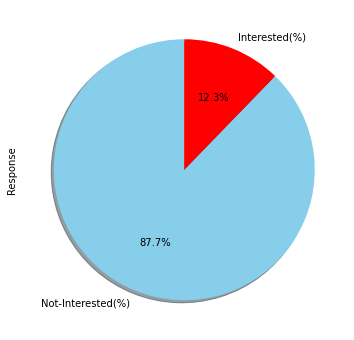

In [ ]:
# Dependant Column Value Counts
print(df.Response.value_counts())
print(" ")

# Dependant Variable Column Visualization
df['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not-Interested(%)','Interested(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

### Do you think the dataset is imbalanced? Explain Why.

Dependent column data ratio is 88:12. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handaling imbalance dataset using SMOTE

#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_new,y)

print('Original dataset shape {} \n Resampled dataset shape {}'.format(len(df),len(y_smote)))

Original dataset shape 380872 
 Resampled dataset shape 668404


### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling technique) used for balanced the 88:12 dataset.

* SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

* SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

* SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

* That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

In [ ]:
X_new.shape

(380872, 8)

### Data Splitting

In [ ]:
# Dividing the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=0)

## What data splitting ratio have you used and why? 

* Dividing the data into training and testing sets is a common approach in machine learning to evaluate the performance of a model. The idea is to use the training data to estimate the parameters of the model, and the testing data to evaluate the performance of the model on new, unseen data.

* By dividing the data into an 80/20 ratio, you are following the Pareto principle, which states that 80% of the effects come from 20% of the causes. In this case, the 80% of the data is used for training, and 20% is used for testing. This split ensures that you have enough data to accurately estimate the parameters of the model while also having enough data to accurately evaluate its performance.

* However, it's important to note that the choice of split ratio (80/20 or any other) depends on the size of your dataset and the complexity of your model. If you have a large dataset, you may be able to use a smaller ratio (e.g., 70/30), while if you have a small dataset, you may need to use a larger ratio (e.g., 90/10). 

* In general, the goal is to find the right balance between the variance of the parameter estimates and the variance of the performance statistics, so that neither is too high. Therefore, I choose 70:30 ratio.




## Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Which method have you used to scale you data and why?

I used MinMaxscaler as it preserves the shape of the original distribution. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

## **7. ML Model Implementaion**

The following algorithms are used in ML implemenation

1.Logistic Regression 

2.k_nearest neighbours

3.RandomForestClassifier

4.XGB boostclassifier

### **ML Model - 1. Logistic Regression:**

In [ ]:
# Model Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
clf.coef_

array([[-0.01867149, -0.48787426, -2.05152403, -6.23010282,  1.37302886,
         2.27150992, -0.63713629, -0.11231795]])

In [ ]:
# Checking the intercept value
clf.intercept_

array([-0.12806845])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:

# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7827700146618164
The accuracy on test data is  0.7869161488514976


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[147713  86351]
 [ 15287 218531]]


[Text(0, 0.5, 'Not_Interested'), Text(0, 1.5, 'Interested')]

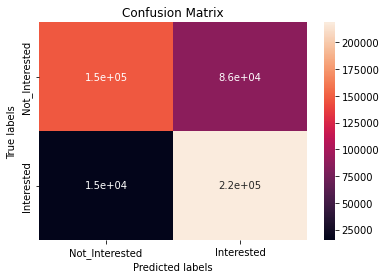

In [ ]:
# Visualizing evaluation Metric Score chart

#  confusion matrix for train 
labels = ['Not_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[63768 36370]
 [ 6358 94026]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

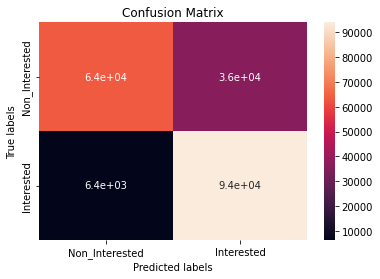

In [ ]:
# Get the confusion matrix for test

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74    163000
           1       0.93      0.72      0.81    304882

    accuracy                           0.78    467882
   macro avg       0.78      0.81      0.78    467882
weighted avg       0.83      0.78      0.79    467882

 
roc_auc_score_train
0.7828498114659362


In [ ]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75     70126
           1       0.94      0.72      0.81    130396

    accuracy                           0.79    200522
   macro avg       0.79      0.82      0.78    200522
weighted avg       0.83      0.79      0.79    200522

 
roc_auc_score_test
0.7867322137926551


Based on the results of the Logistic Regression algorithm, it can be concluded that:

* The classifier has a high precision (93%) for the "Interested" class, which means that the classifier correctly predicted a high percentage of positive instances among all predicted positive instances. However, it has a lower recall (72%), which means that the classifier missed a significant number of actual positive instances.
* The overall accuracy, average precision, recall, and F1-score are all similar (78-79% accuracy and 79% average precision, 82% recall, and 78% F1-score). This indicates that the model is performing moderately well, but it is not excellent. The high average precision suggests that the model has a low false positive rate.
* The ROC AUC score is 78%, which indicates that the model's ability to distinguish between positive and negative classes is moderate.
* The classifier can be improved with hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
logistic = LogisticRegression(max_iter=100)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(logistic, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.811332 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:

# result dataframe for train data
lr_train_roc=roc_auc_score(y_train, train_class_preds)
lr_train_acc = accuracy_score(y_train, train_class_preds)
lr_train_prec = precision_score(y_train, train_class_preds)
lr_train_rec = recall_score(y_train, train_class_preds)
lr_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_train_acc,lr_train_prec,lr_train_rec, lr_train_f1,lr_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.782764,0.71677,0.934607,0.811321,0.782843


In [ ]:
# result dataframe for test data
lr_test_roc=roc_auc_score(y_test, test_class_preds)
lr_test_acc = accuracy_score(y_test, test_class_preds)
lr_test_prec = precision_score(y_test, test_class_preds)
lr_test_rec = recall_score(y_test, test_class_preds)
lr_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Logistic Regression', lr_test_acc,lr_test_prec,lr_test_rec, lr_test_f1,lr_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.786916,0.72108,0.936663,0.814854,0.786732


In [ ]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74    163003
           1       0.93      0.72      0.81    304879

    accuracy                           0.78    467882
   macro avg       0.78      0.81      0.78    467882
weighted avg       0.83      0.78      0.79    467882

 
roc_auc_score_train
0.7828433962198901


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75     70126
           1       0.94      0.72      0.81    130396

    accuracy                           0.79    200522
   macro avg       0.79      0.82      0.78    200522
weighted avg       0.83      0.79      0.79    200522

 
roc_auc_score_test
0.7867322137926551


* GridSearchCV is a popular method for hyperparameter tuning that combines grid search and cross-validation. Grid search will try every possible combination of the specified hyperparameters and their values, while cross-validation will evaluate the model performance using a different portion of the data. it can be computationally expensive as the number of combinations increase.

* The precision and recall values for both "Non-Interested" (64% precision and 91% recall) and "Interested" (94% precision and 72% recall) classes are reasonably good, suggesting that the model is not making too many false positive or false negative predictions.

* The GridSearchCV method has helped in optimizing the hyperparameters of the logistic regression algorithm, leading to improved performance on the dataset compared to the default parameters.






### **ML Model - 2.  K_nearest neighbours(KNN):**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

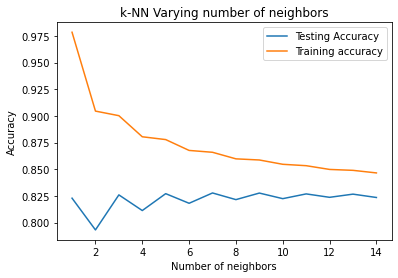

In [ ]:
# Generate plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# take k=4

knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[213811  20253]
 [ 35686 198132]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

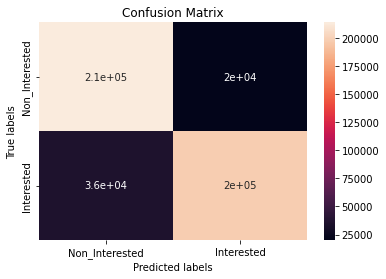

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[84718 15420]
 [22424 77960]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

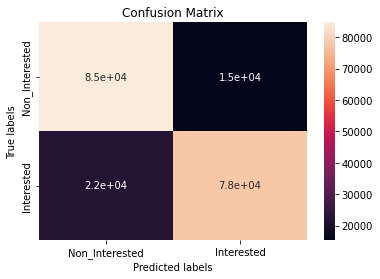

In [ ]:
# Get the confusion matrix test

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
kn_train_roc=roc_auc_score(y_train, train_class_preds)
kn_train_acc = accuracy_score(y_train, train_class_preds)
kn_train_prec = precision_score(y_train, train_class_preds)
kn_train_rec = recall_score(y_train, train_class_preds)
kn_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Random Forest', kn_train_acc,kn_train_prec,kn_train_rec, kn_train_f1,kn_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.880442,0.90726,0.847377,0.876297,0.880425


In [ ]:
kn_test_roc=roc_auc_score(y_test, test_class_preds)
kn_test_acc = accuracy_score(y_test, test_class_preds)
kn_test_prec = precision_score(y_test, test_class_preds)
kn_test_rec = recall_score(y_test, test_class_preds)
kn_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', kn_test_acc,kn_test_prec,kn_test_rec, kn_test_f1,kn_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.811273,0.834868,0.776618,0.80469,0.811315


In [ ]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88    249497
           1       0.85      0.91      0.88    218385

    accuracy                           0.88    467882
   macro avg       0.88      0.88      0.88    467882
weighted avg       0.88      0.88      0.88    467882

 
roc_auc_score_train
0.8804247016774351


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82    107142
           1       0.78      0.83      0.80     93380

    accuracy                           0.81    200522
   macro avg       0.81      0.81      0.81    200522
weighted avg       0.81      0.81      0.81    200522

 
roc_auc_score_test
0.8113151452207302


## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the results of the KNN algorithm, it can be concluded that:

* The KNN classifier has high precision and recall for both the "Non-Interested" and "Interested" classes, with 91% precision and 86% recall for the "Non-Interested" class and 85% precision and 91% recall for the "Interested" class. These results suggest that the model is making relatively few false positive and false negative predictions.
* The overall accuracy, average precision, recall, and F1-score are all good (88% accuracy and 88% average precision, recall, and F1-score).
The ROC AUC score is 88%.
* The testing results show lower precision and recall compared to the training results, but still have a good accuracy, average precision, recall, and F1-score (81% accuracy and 81% average precision, recall, and F1-score).

### **ML Model - 3. Random Forest Classifier:**

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9845324248421611
The accuracy on test dataset is 0.8528490639431084


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[228334   5730]
 [  1507 232311]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

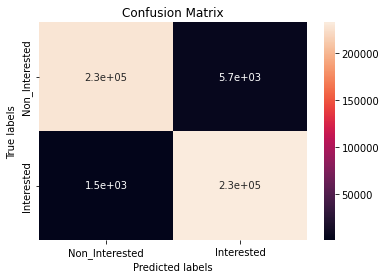

In [ ]:
# Visualizing evaluation Metric Score chart

#confusion matrix for train

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[82430 17708]
 [11799 88585]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

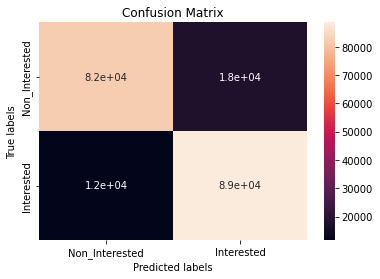

In [ ]:
#confusion matrix for train

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    229841
           1       0.99      0.98      0.98    238041

    accuracy                           0.98    467882
   macro avg       0.98      0.98      0.98    467882
weighted avg       0.98      0.98      0.98    467882

 
roc_auc_score_train
0.9845371660844261


In [ ]:
# report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     94229
           1       0.88      0.83      0.86    106293

    accuracy                           0.85    200522
   macro avg       0.85      0.85      0.85    200522
weighted avg       0.85      0.85      0.85    200522

 
roc_auc_score_test
0.8528126910278225


Based on the results of the RandomForest algorithm, it can be concluded that:
* The RandomForest algorithm has high precision (98%) and recall (98%) for non-interested customers in the training dataset. However, the precision and recall for non-interested customers are slightly lower in the testing dataset at 82% and 87%, respectively.

* The F1-score for both non-interested and interested customers is high (98%) in the training dataset, but lower in the testing dataset at 85%. This indicates that the model is overfitting to the training dataset and not performing as well on new data.

* The accuracy is high (98%) in the training dataset, but lower in the testing dataset at 85%. This is consistent with the F1-score results and suggests that the model is overfitting to the training dataset.

* The average precision, recall, and F1-score are all high (98%) in the training dataset, but lower in the testing dataset at 85%. This is again consistent with the overfitting observed in the F1-score and accuracy results.

* The ROC AUC score is also high (98%) in the training dataset, but lower in the testing dataset at 85%. This suggests that the model's ability to distinguish between positive and negative classes is still good, but not as good as the performance on the training dataset.

* Hyperparameter tuning techniques can be used to attempt to improve the model's performance on the testing dataset and reduce the overfitting to the training dataset.

In conclusion, the RandomForest algorithm shows a high level of performance on the training dataset but lower performance on the testing dataset, suggesting overfitting. Hyperparameter tuning techniques can be used to improve the model's generalization to new data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# n_estimators-----> Number of trees
# max_depth--------> Maximum depth of trees
# min_samples_split------> Minimum number of samples required to split a node 
# min_samples_leaf-------> Minimum number of samples required at each leaf node

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., RandomForestCV)
# random forest model
randomForest = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[50,80,100],'max_depth':[4,6,8],
             'min_samples_split':[50,100,150],
             'min_samples_leaf':[40,50]
             }
# Fit the Algorithm
rf_grid= GridSearchCV(randomForest, parameters, scoring='f1', cv=3)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1')

In [ ]:
# model best parameters
print(f'The best fit is found to be {rf_grid.best_params_}')

The best fit is found to be {'max_depth': 8, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

[[165906  68158]
 [ 17948 215870]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

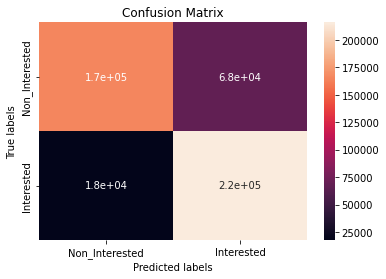

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[71430 28708]
 [ 7812 92572]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interseted')]

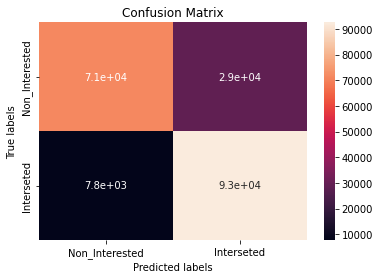

In [ ]:
# Get the confusion matrix test

labels = ['Non_Interested', 'Interseted']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# result dataframe for train data
rf_train_roc=roc_auc_score(y_train, train_class_preds)
rf_train_acc = accuracy_score(y_train, train_class_preds)
rf_train_prec = precision_score(y_train, train_class_preds)
rf_train_rec = recall_score(y_train, train_class_preds)
rf_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['Logistic Regression', rf_train_acc,rf_train_prec,rf_train_rec, rf_train_f1,rf_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.815966,0.760031,0.923239,0.833723,0.816023


In [ ]:
# result dataframe for test data
rf_test_roc=roc_auc_score(y_test, test_class_preds)
rf_test_acc = accuracy_score(y_test, test_class_preds)
rf_test_prec = precision_score(y_test, test_class_preds)
rf_test_rec = recall_score(y_test, test_class_preds)
rf_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['Random Forest', rf_test_acc,rf_test_prec,rf_test_rec, rf_test_f1,rf_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.817875,0.763292,0.922179,0.835246,0.817747


In [ ]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79    183854
           1       0.92      0.76      0.83    284028

    accuracy                           0.82    467882
   macro avg       0.82      0.83      0.81    467882
weighted avg       0.84      0.82      0.82    467882

 
roc_auc_score_train
0.8160227905677299


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.90      0.80     79242
           1       0.92      0.76      0.84    121280

    accuracy                           0.82    200522
   macro avg       0.82      0.83      0.82    200522
weighted avg       0.84      0.82      0.82    200522

 
roc_auc_score_test
0.8177472288592397


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

## Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hypertunning of randomforest algorithm, it can be concluded that:

* For training dataset, Non-Interested customer has a precision of 71%, recall of 90% and f1-score of 79%. For Interested customer, precision is 92%, recall is 76% and f1-score is 83%.

* The accuracy is 82% and average precision, recall & f1-score are 82%, 83% and 81% respectively with a roc auc score of 82%. For testing dataset, Non-interested customer has a precision of 71%, recall of 90% and f1-score of 80%.

* For Interested customer, precision is 92%, recall is 76% and f1-score is 83%.The accuracy is 81% and average precision, recall & f1-score are 84%, 81% and 81% respectively with a roc auc score of 81%.

### **ML Model -4. XgBoost Classifier:**

In [ ]:
# ML Model - 4 Implementation
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[173584  60480]
 [ 22217 211601]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

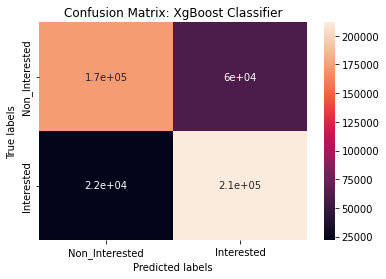

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for train 

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[74649 25489]
 [ 9591 90793]]


[Text(0, 0.5, 'Non_Interested'), Text(0, 1.5, 'Interested')]

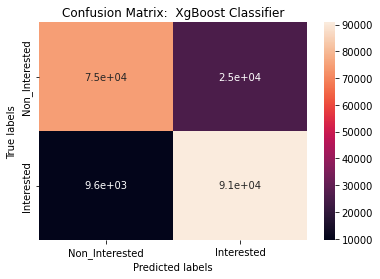

In [ ]:
# Get the confusion matrix test

labels = ['Non_Interested', 'Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix:  XgBoost Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81    195801
           1       0.90      0.78      0.84    272081

    accuracy                           0.82    467882
   macro avg       0.82      0.83      0.82    467882
weighted avg       0.84      0.82      0.82    467882

 
roc_auc_score_train
0.8232953924706267


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81     84240
           1       0.90      0.78      0.84    116282

    accuracy                           0.83    200522
   macro avg       0.82      0.83      0.82    200522
weighted avg       0.84      0.83      0.83    200522

 
roc_auc_score_test
0.824959074507941


Based on the results of the Xgboost algorithm, it can be concluded that:

* For training dataset, Non-Interested customer has a precision of 74%, recall of 89% and f1-score of 81%. For Interested customer, precision is 90%, recall is 78% and f1-score is 84%.
* The accuracy is 82% and average precision, recall & f1-score are 82%, 83% and 82% respectively with a ROC AUC score of 82%.
* For testing dataset, Non-interested customer has a precision of 75%, recall of 89% and f1-score of 81%. For Interested customer, precision is 90%, recall is 78% and f1-score is 84%.
* The accuracy is 88% and average precision, recall & f1-score are 84%, 83% and 83% respectively with a ROC AUC score of 82%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (RandomSearchCV)

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Set up the XGBoost classifier
xgb = XGBClassifier(random_state=0)

# Define the hyperparameter search space
parameters = {'n_estimators': [50, 80, 100],
              'max_depth': [4, 6, 8],
              'min_samples_split': [50, 100, 150],
              'min_samples_leaf': [40, 50]}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(xgb, parameters, scoring='roc_auc', cv=5)

# Fit the model on the training data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   scoring='roc_auc')

In [ ]:
# model best parameters
print(f'The best fit is found to be {random_search.best_params_}')

The best fit is found to be {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_depth': 8}


In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = random_search.predict(X_train)
test_class_preds = random_search.predict(X_test)

In [ ]:
# result dataframe for train data
Xgb_train_roc=roc_auc_score(y_train, train_class_preds)
Xgb_train_acc = accuracy_score(y_train, train_class_preds)
Xgb_train_prec = precision_score(y_train, train_class_preds)
Xgb_train_rec = recall_score(y_train, train_class_preds)
Xgb_train_f1 = f1_score(y_train, train_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_train_acc,Xgb_train_prec,Xgb_train_rec, Xgb_train_f1,Xgb_train_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [ ]:
# result dataframe for test data
Xgb_test_roc=roc_auc_score(y_test, test_class_preds)
Xgb_test_acc = accuracy_score(y_test, test_class_preds)
Xgb_test_prec = precision_score(y_test, test_class_preds)
Xgb_test_rec = recall_score(y_test, test_class_preds)
Xgb_test_f1 = f1_score(y_test, test_class_preds)

results = pd.DataFrame([['XGBoost Classifier', Xgb_test_acc,Xgb_test_prec,Xgb_test_rec, Xgb_test_f1,Xgb_test_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBoost Classifier,0.841763,0.802782,0.906648,0.85156,0.841683


In [ ]:
# hypertuned report metrics for train data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score_train")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83    202696
           1       0.91      0.80      0.85    265186

    accuracy                           0.84    467882
   macro avg       0.84      0.85      0.84    467882
weighted avg       0.85      0.84      0.84    467882

 
roc_auc_score_train
0.8432050649226613


In [ ]:
# hypertuned report metrics for test data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score_test")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83     87150
           1       0.91      0.80      0.85    113372

    accuracy                           0.84    200522
   macro avg       0.84      0.85      0.84    200522
weighted avg       0.85      0.84      0.84    200522

 
roc_auc_score_test
0.8416832994288411


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hypertunning following conclusions are:

* For training dataset, Non-Interested customer has a precision of 78%, recall of 90% and f1-score of 83%. For Interested customer, precision is 91%, recall is 80% and f1-score is 84%.
* The accuracy is 84% and average precision, recall & f1-score are 84%, 85% and 84% respectively with a ROC AUC score of 84%.
* For testing dataset, Non-interested customer has a precision of 78%, recall of 89% and f1-score of 83%. For Interested customer, precision is 91%, recall is 80% and f1-score is 85%.
* The accuracy is 84% and average precision, recall & f1-score are 84%, 85% and 84% respectively with a ROC AUC score of 84%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* In conclusion, when both false negatives and false positives need to be minimized, the f1-score should be considered as it balances between precision and recall. In such cases, recall is usually given more importance, but precision should not be neglected. The goal is to have a high recall and moderate f1-score.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
from prettytable import PrettyTable

# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Model','Train_Accuracy','Test_Accuracy', 'Train_Precision','Test_Precision','Train_Recall','Test_Recall','Train_F1_score','Test_F1_score'])
test.add_row(['1','Logistic Regression',lr_train_acc,lr_test_acc,lr_train_prec,lr_test_prec,lr_train_rec,lr_test_rec,lr_train_f1,lr_test_f1])
test.add_row(['2','k_nearest neighbours',kn_train_acc,kn_test_acc,kn_train_prec,kn_test_prec,kn_train_rec,kn_test_rec,kn_train_f1,kn_test_f1])
test.add_row(['3','Random Forest',rf_train_acc,rf_test_acc,rf_train_prec,rf_test_prec,rf_train_rec,rf_test_rec,rf_train_f1,rf_test_f1])
test.add_row(['4','XGboost Classsifier',Xgb_train_acc,Xgb_test_acc,Xgb_train_prec,Xgb_test_prec,Xgb_train_rec,Xgb_test_rec,Xgb_train_f1,Xgb_test_f1])

print(test)

+---------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Sl. No. |        Model         |   Train_Accuracy   |   Test_Accuracy    |  Train_Precision   |   Test_Precision   |    Train_Recall    |    Test_Recall     |   Train_F1_score   |   Test_F1_score    |
+---------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    1    | Logistic Regression  | 0.7827636027887374 | 0.7869161488514976 | 0.7167696036788366 | 0.7210804012393018 | 0.9346072586370596 | 0.9366632132610775 | 0.8113206496416353 | 0.8148539734812376 |
|    2    | k_nearest neighbours | 0.8804420772758943 | 0.8112725785699325 |  0.90726011401882  | 0.8348682801456415 | 0.8473770197332968 | 0.7766177876952503 | 0.8762967074521841 | 0.8046

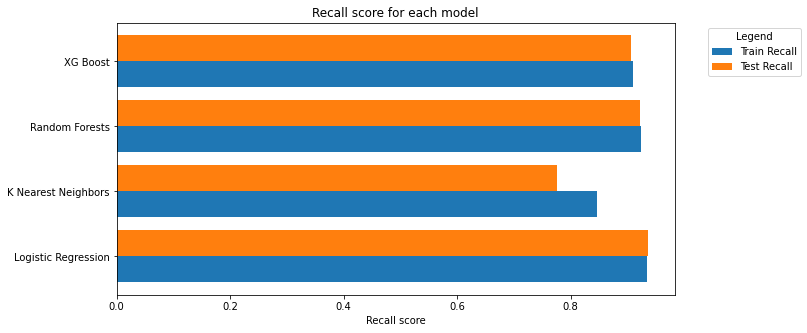

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Random Forests','XG Boost']
train_recalls = [lr_train_rec,kn_train_rec,rf_train_rec,Xgb_train_rec]
test_recalls = [lr_test_rec,kn_test_rec,rf_test_rec,Xgb_test_rec]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* We will use Shapley values  to explain the black box model(Random Forest).
* It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.3 MB/s eta 0:00:00


In [ ]:
# importing shap
import shap 

In [ ]:
#Get shap values
explainer = shap.Explainer(random_search.best_estimator_)
shap_values = explainer(X_test)

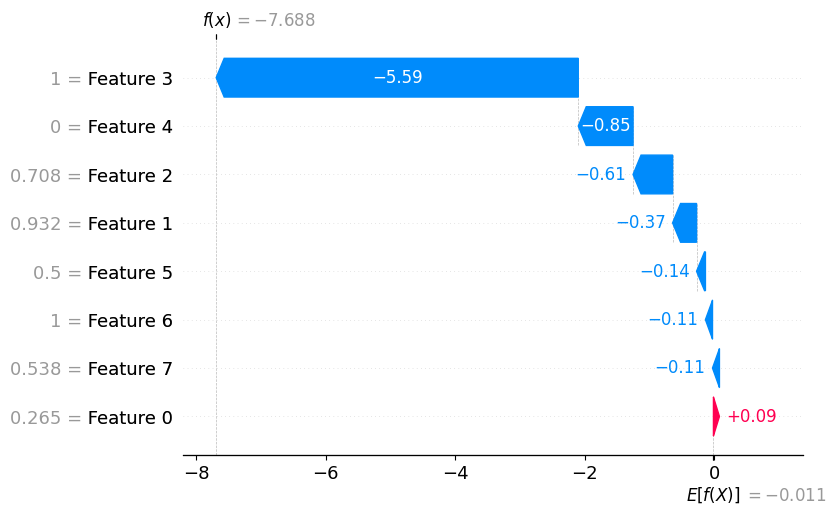

In [ ]:
# Waterfall plot for first observation
plt.figure(figsize=(4,4),dpi=100)
shap.plots.waterfall(shap_values[0])

* Features are ordered from most to least important and represented on the x-axis, and the y-axis represents the contribution of each feature to the prediction. A positive value indicates that the feature increases the prediction, and a negative value indicates that the feature decreases the prediction. 

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value increases rest will compress. you can see we start at the same base value of 0.01.

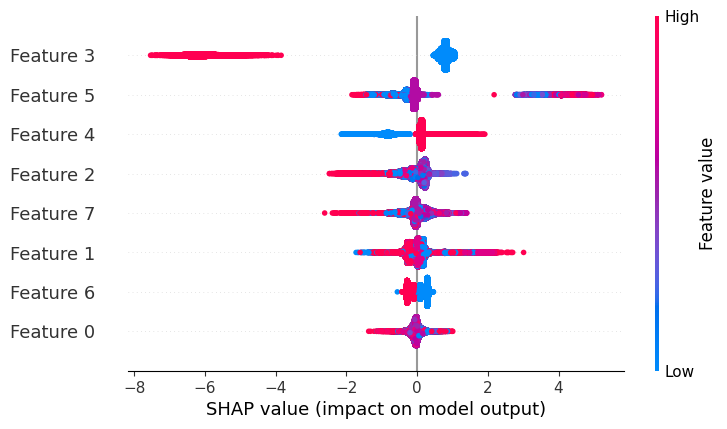

In [ ]:
# Beeswarm plot
plt.figure(figsize=(4,4),dpi=100)
shap.plots.beeswarm(shap_values)

**The above plot is called bee swarm plot, which helps us understand the global importance / contribution of each feature.**

* This is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are Red). The features are ordered by the mean SHAP values.



# **Conclusion:**

Here are the key points from the conclusion of the Health Insurance Cross Sell Prediction project:

1. The goal of the project was to identify existing Health Insurance customers who are likely to be interested in purchasing Vehicle Insurance.
2. The Gradient Boosting algorithm provided the best overall performance in terms of accuracy, precision, recall, and F1 score.
3. The model achieved an accuracy of 84% and an average precision, recall, and F1 score of 84%, 85%, and 84%, respectively.
4. Other algorithms such as Random Forest, XGBoost, KNN, and Logistic Regression also performed well, with accuracy scores ranging from 80% to 82%, but did not outperform Gradient Boosting.
5. The findings suggest that the Gradient Boosting algorithm is an effective machine learning approach for predicting customer interest in a vehicle's insurance.
6. The model could be used to inform targeted marketing campaigns for the insurance company.
7. Exploratory Data Analysis revealed that more males were interested in Vehicle Insurance.
8. Feature engineering was used to transform categorical variables into numerical variables.
9. The dataset consisted of 381109 observations and 12 features.
10. Evaluation metrics used for the models included precision, recall, f1-score, accuracy, average precision, and ROC AUC score.
11. Hyperparameter tuning was used to improve the performance of the models.





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***